# Clustering

In [49]:
library(readxl)
library(tidyverse) #data Manipulation
library(magrittr)
library(cluster) #Clustering algorithms
#install.packages('cluster.datasets')
library(cluster.datasets)
library(cowplot)
#install.packages('clValid')
library(clValid)
#install.packages('ggfortify')
library(ggfortify)
#install.packages('clustree')
library(clustree)
library(factoextra)#Clustering Algorithms & Visualization
library(FactoMineR)
library(gridExtra)
library(corrplot)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)
#install.packages('writexl')
library(writexl)
library(GGally)
#install.packages('ggiraphExtra')
library(ggiraphExtra)
library(knitr)
library(kableExtra)

In [11]:
dfsimple <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfsimple.xlsx",sheet=1)

dfsimple[is.na(dfsimple)] <- 0
head(dfsimple)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3


In [12]:
df.wa.country <- dfsimple[,c('Country','ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp' )]
df.wa.country[is.na(df.wa.country)] <- 0
head(df.wa.country)
sapply(df.wa.country, class)

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5


Country        ptap        bore        pspr        uspr        pwel 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       uwel        surw        tles        tmor        rain        phom 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       imws        pipy        truc        ctan        bott        uiws 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       othw        iwsp        basw        liws        watp 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

To apply clustering, we want to only use water accessibility variables

In [86]:
write_xlsx(df.wa.country , 'C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-access.xlsx')

In [14]:
df.explore <- dfsimple[,c('Country','bicy','cart','mcyc',
                         'pcar',
                         'boat',
                         'wigc')]
head(df.explore)

Country,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1
Albania,26.4,3.2,9.6,37.0,0.7,0.1
Angola,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3


In [15]:
write_xlsx(df.explore , 'C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-explore.xlsx')

linkage: single or average or complete and Different Methods

[1] 22

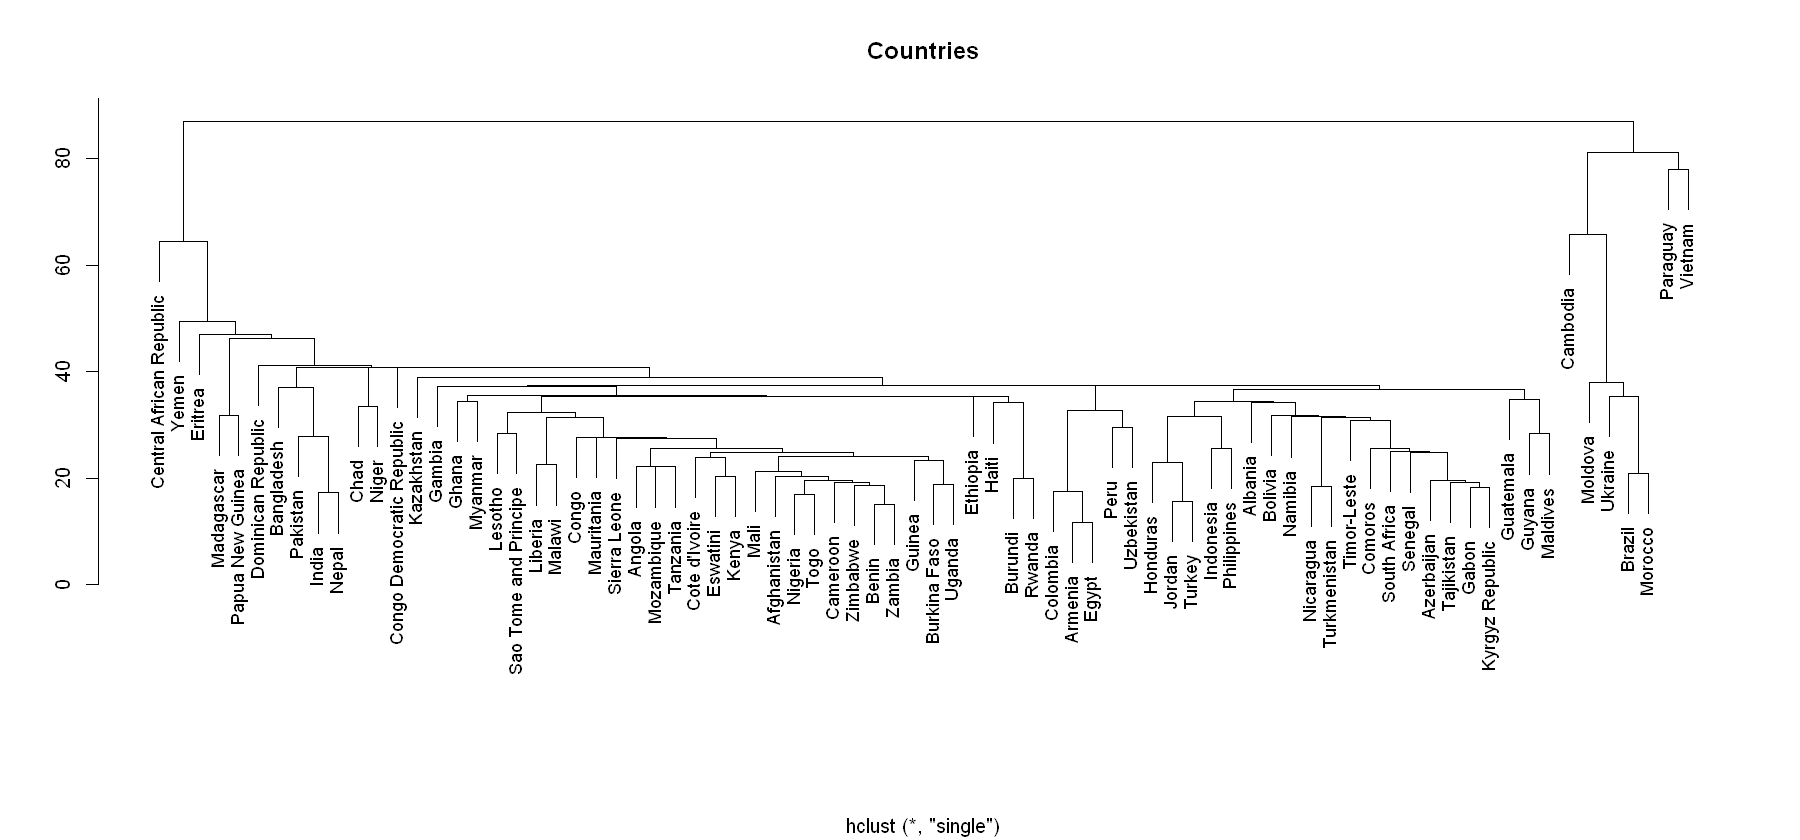

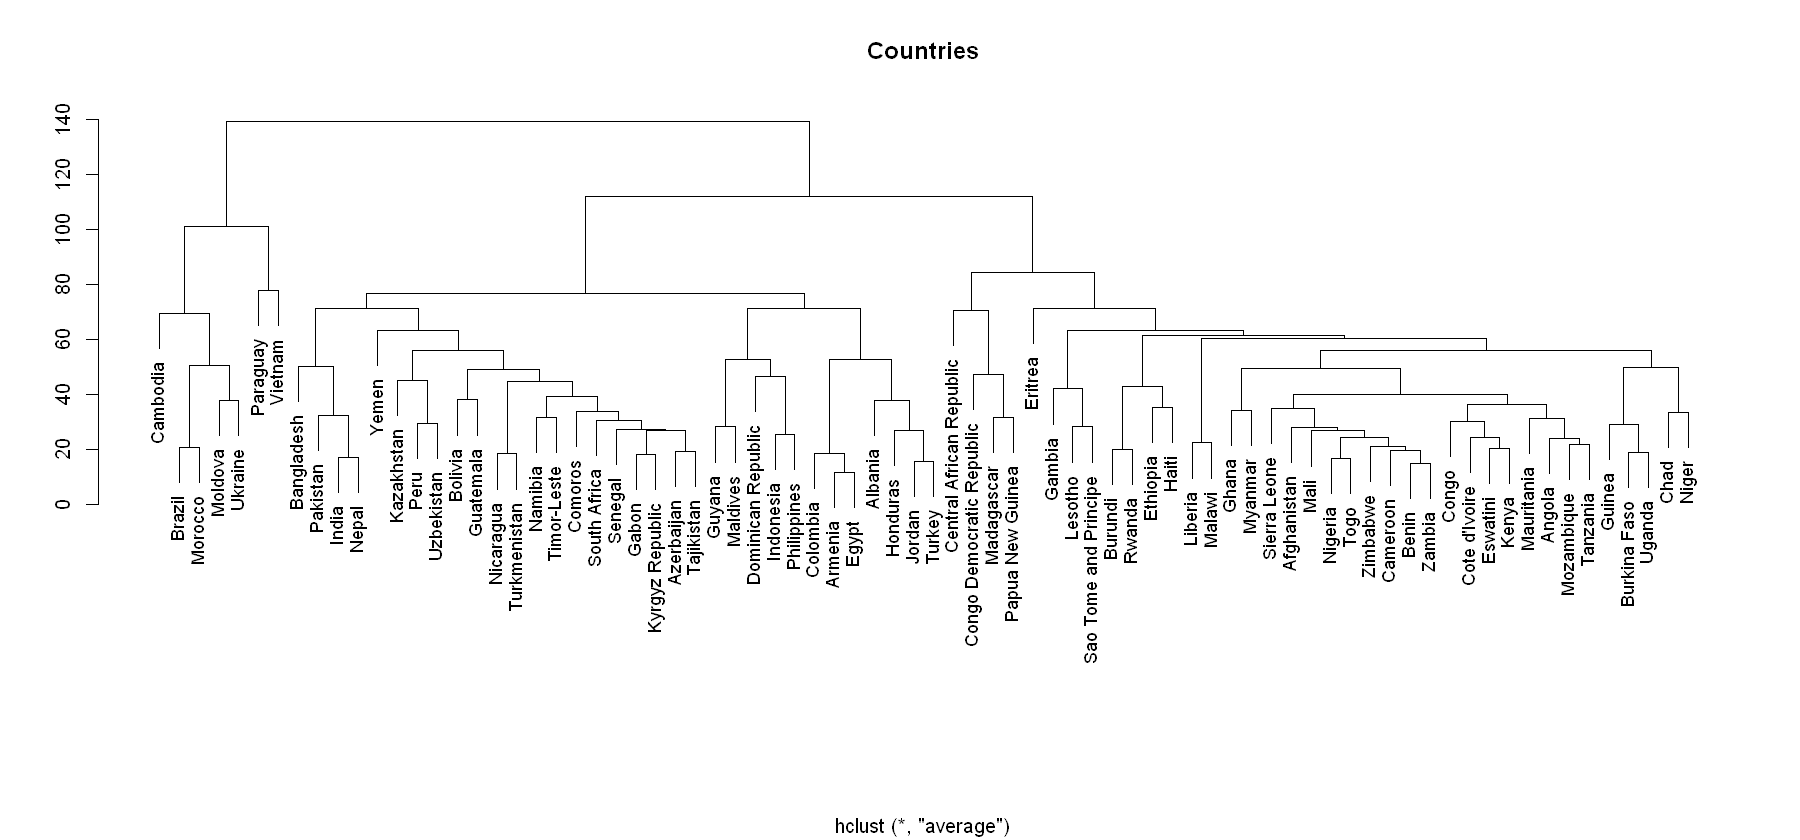

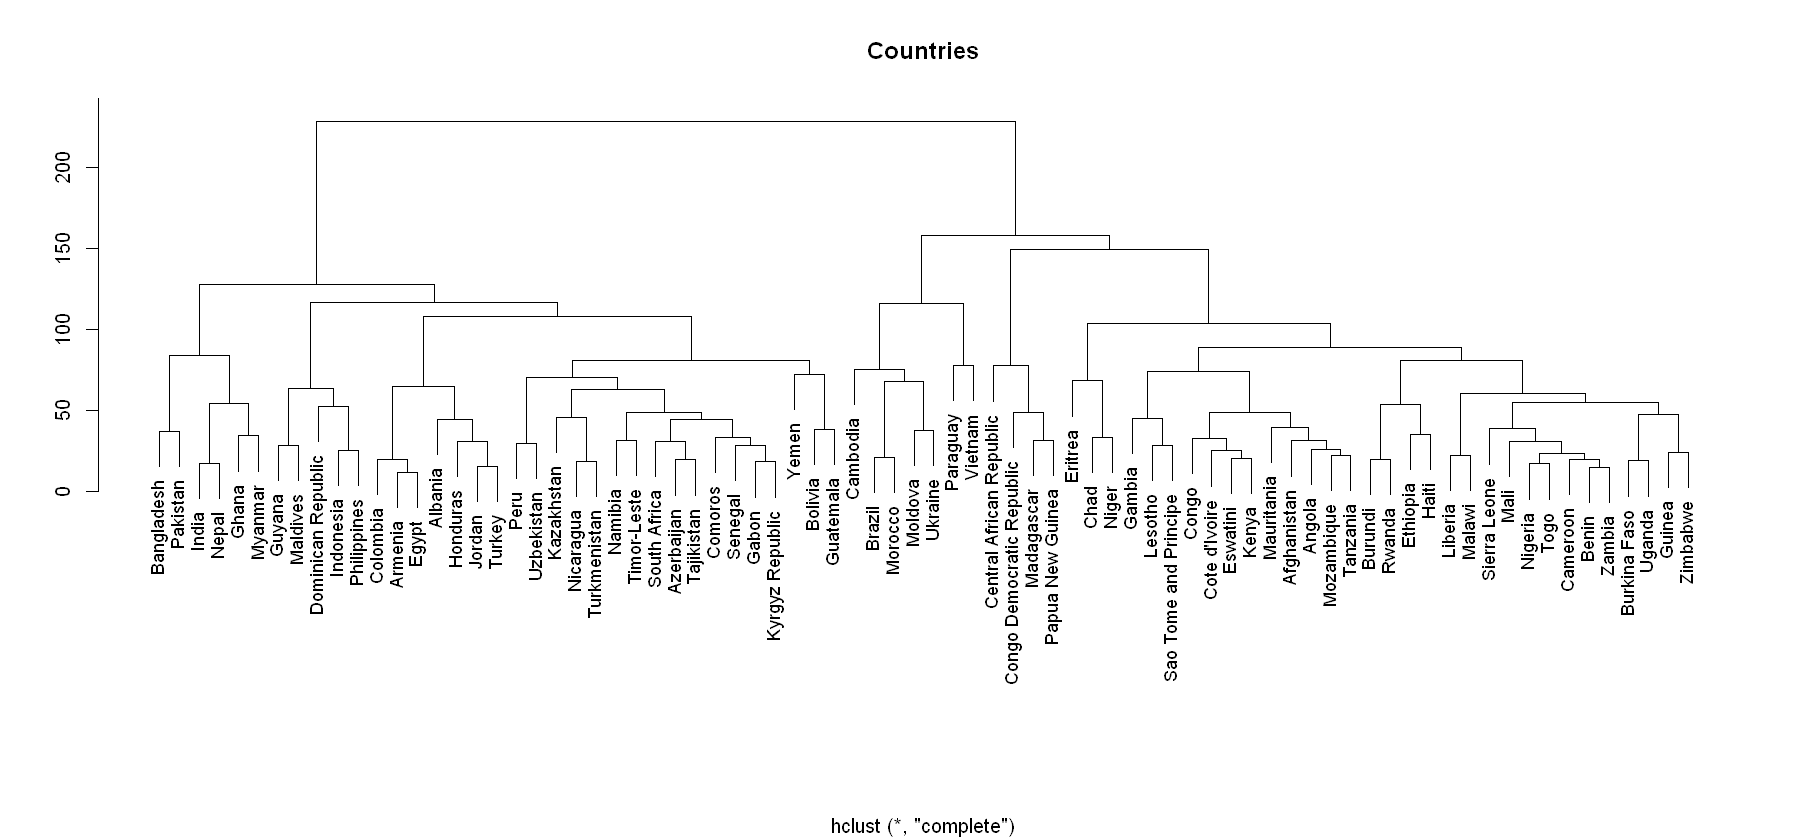

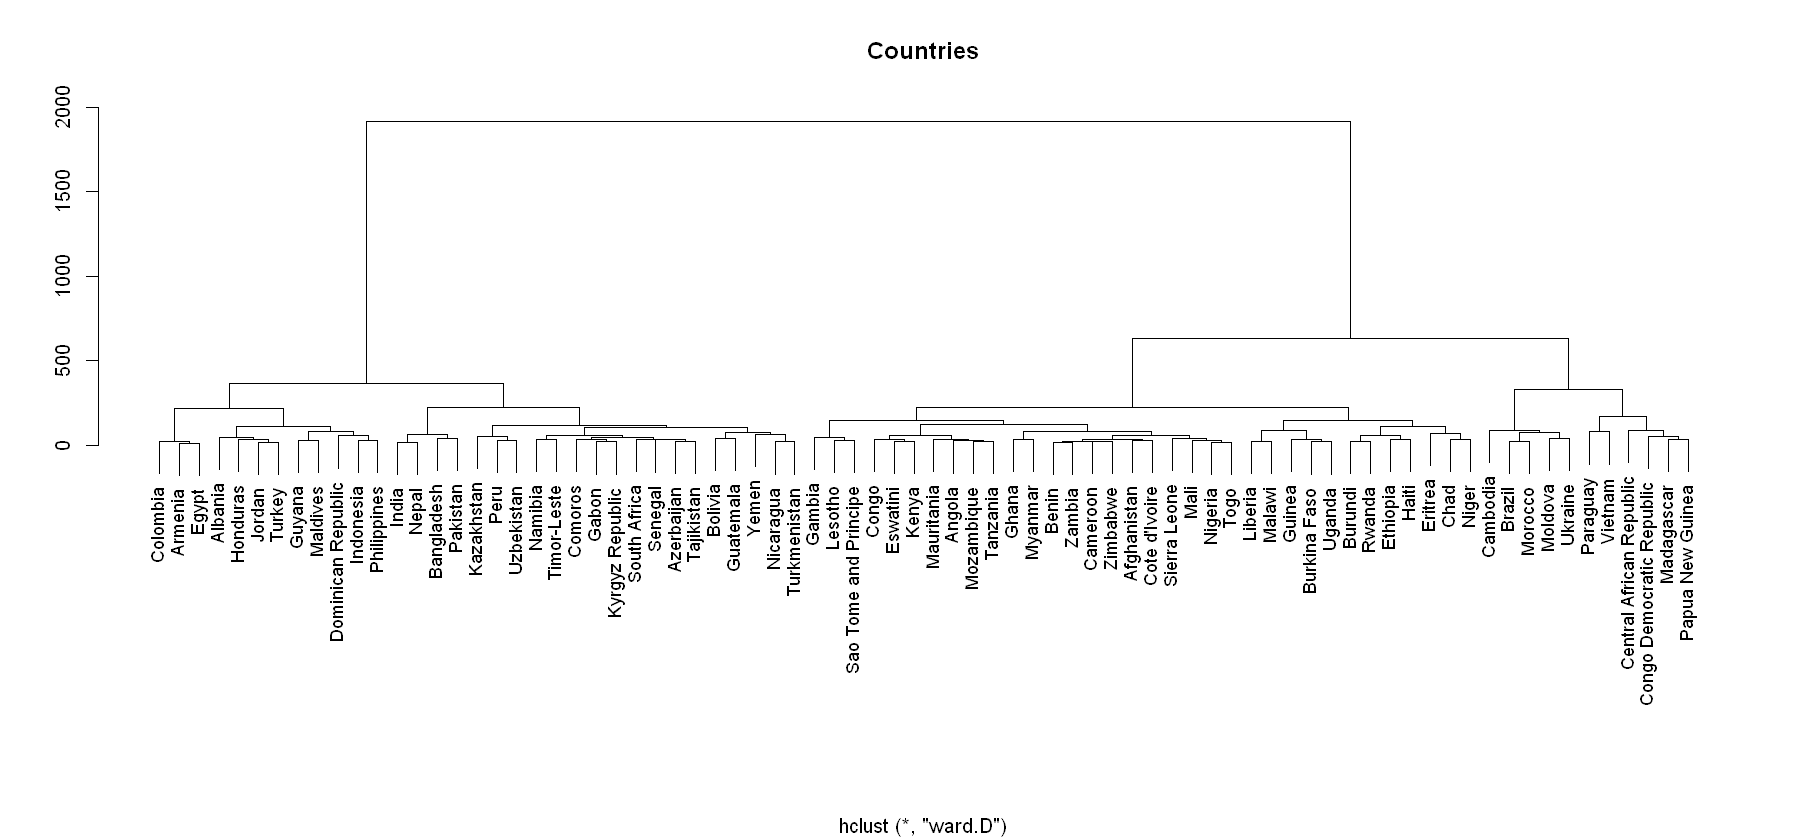

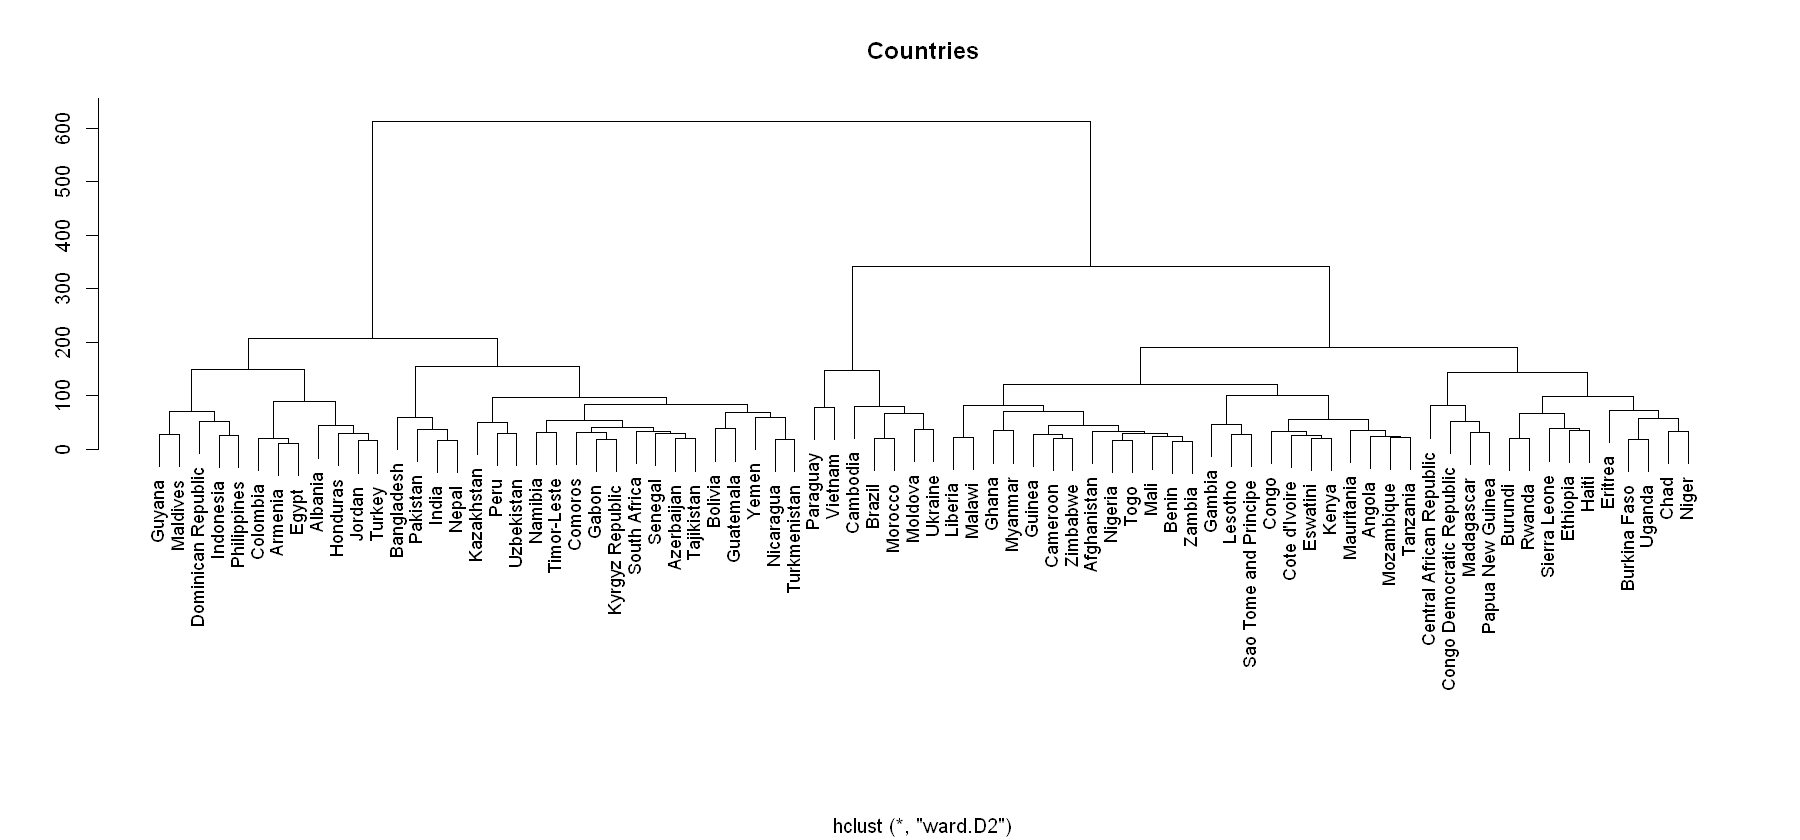

In [80]:
df.wa <- dfsimple[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp' )]

hc=hclust(dist(df.wa), method ="single")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc=hclust(dist(df.wa), method ="average")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.complete =hclust(dist(df.wa), method ="complete")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.complete, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward=hclust(dist(df.wa), method ="ward.D")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward2=hclust(dist(df.wa), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

In [83]:
list(df.wa)
colnames(df.wa)

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,...,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,...,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3
2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,...,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9
10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,...,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5
0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,...,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6
3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,...,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9
2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,...,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5
13.0,28.9,0.3,1.2,4.4,20.8,5.8,49.8,12.1,0.4,...,4.2,0.2,0.3,0.0,28.3,0.4,29.6,64.0,7.3,37.4
5.3,0.0,0.0,0.0,1.7,6.2,5.2,11.2,0.7,0.0,...,54.1,1.7,0.0,0.0,12.3,0.9,85.7,87.3,0.0,88.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,3.3,24.0,2.7,0.0,0.0,0.0,0.0


[1] "ptap" "bore" "pspr" "uspr" "pwel" "uwel" "surw" "tles" "tmor" "rain"
[11] "phom" "imws" "pipy" "truc" "ctan" "bott" "uiws" "othw" "iwsp" "basw"
[21] "liws" "watp"

# Determining the Best Cut for different methods

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


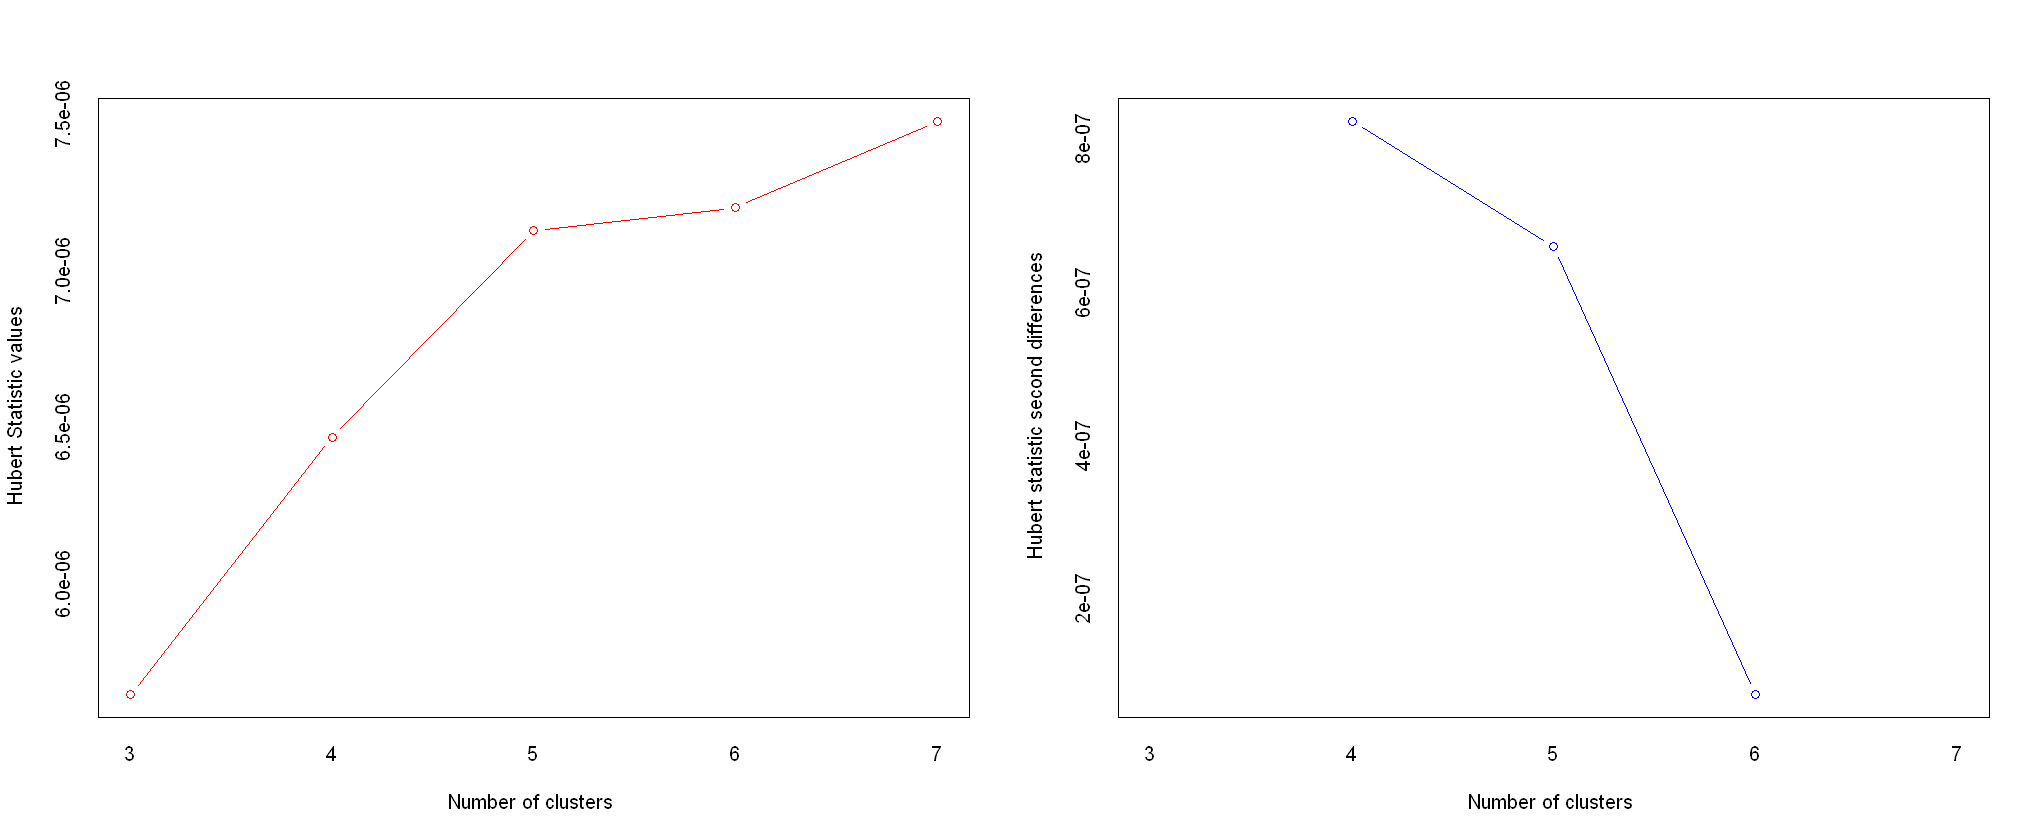

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 12 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


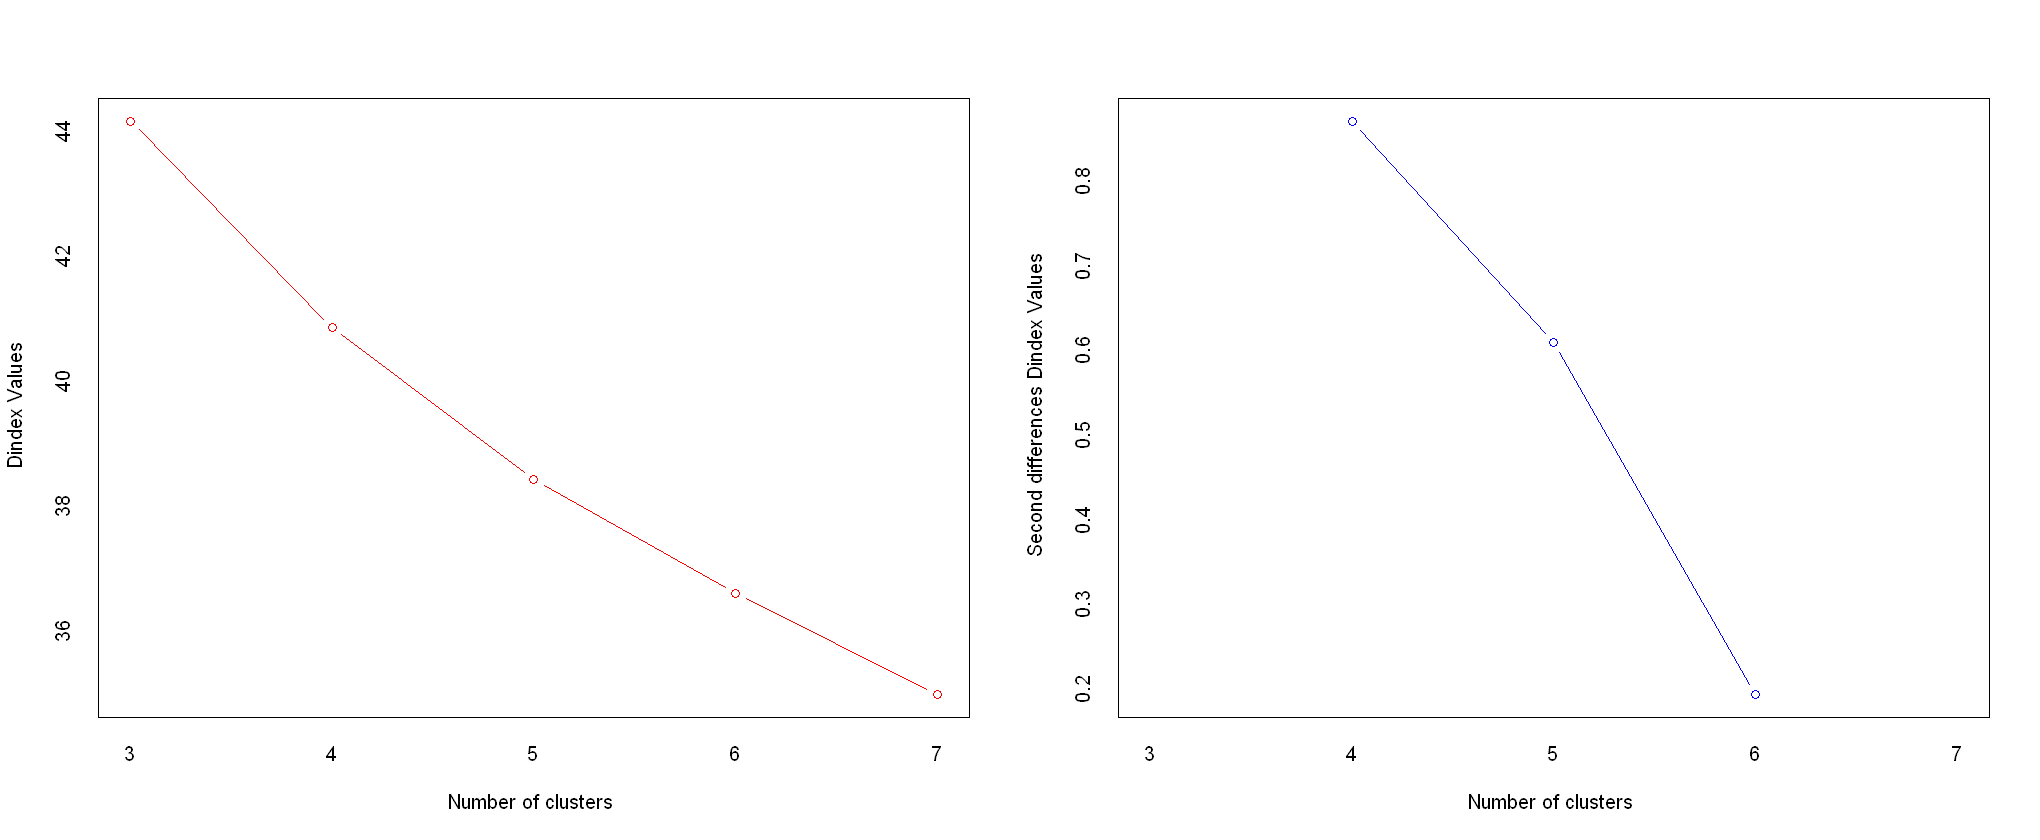

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


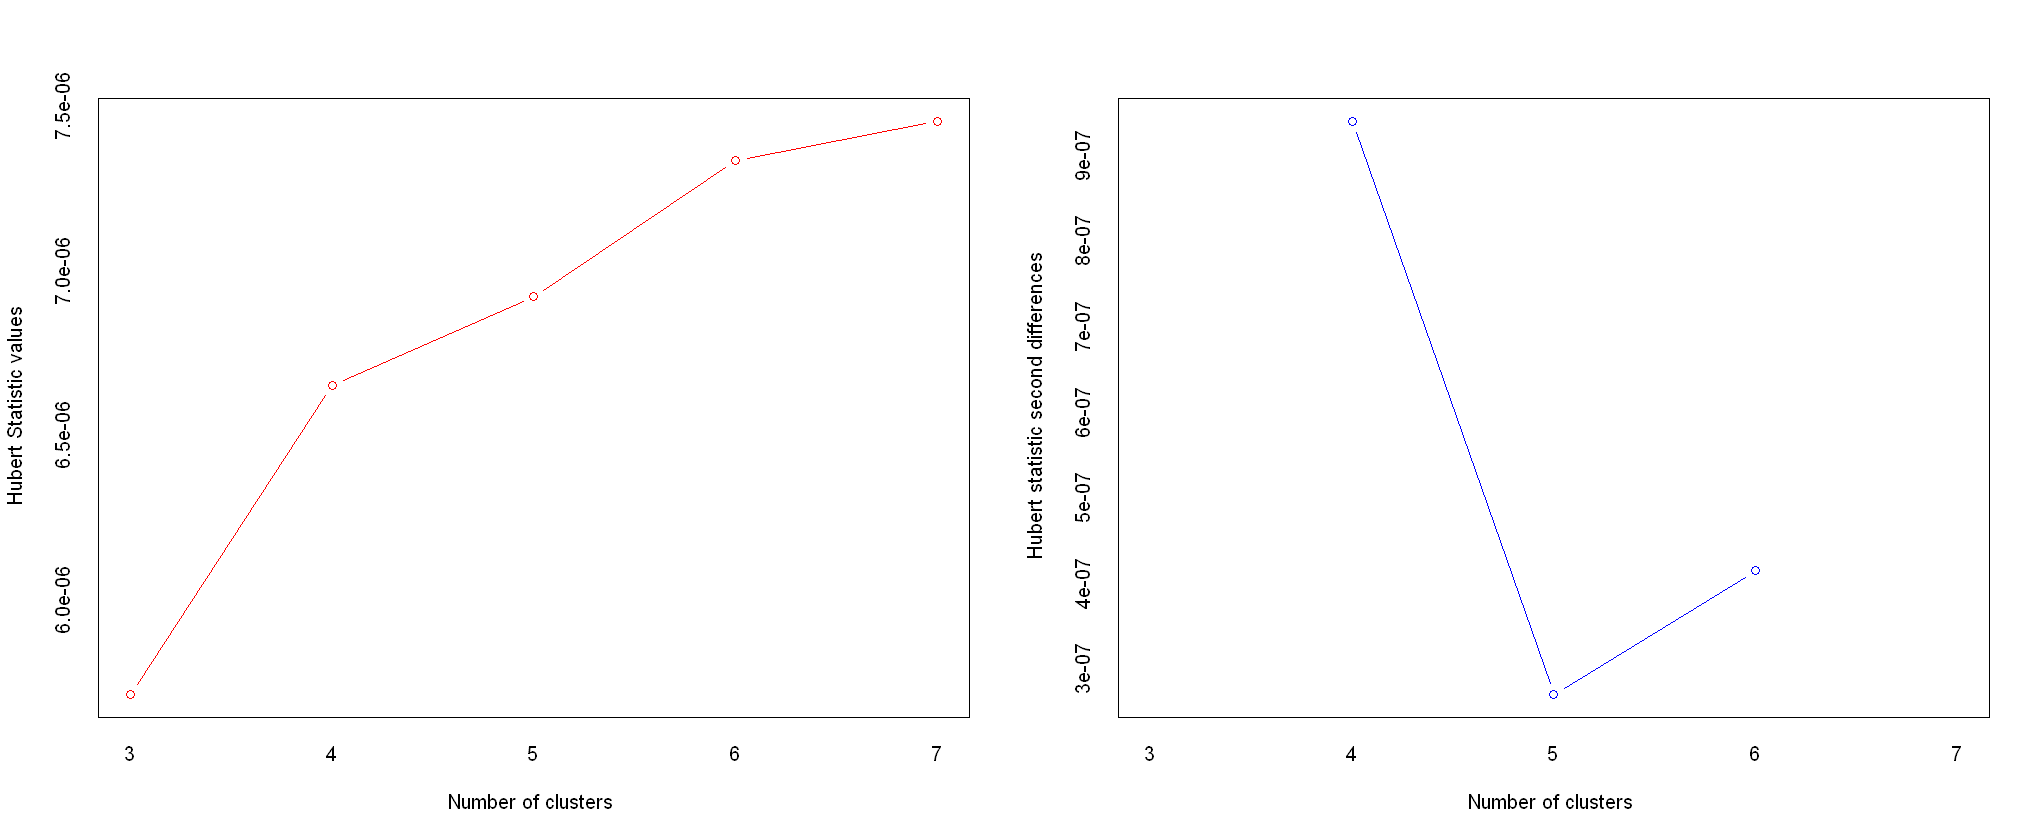

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 10 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


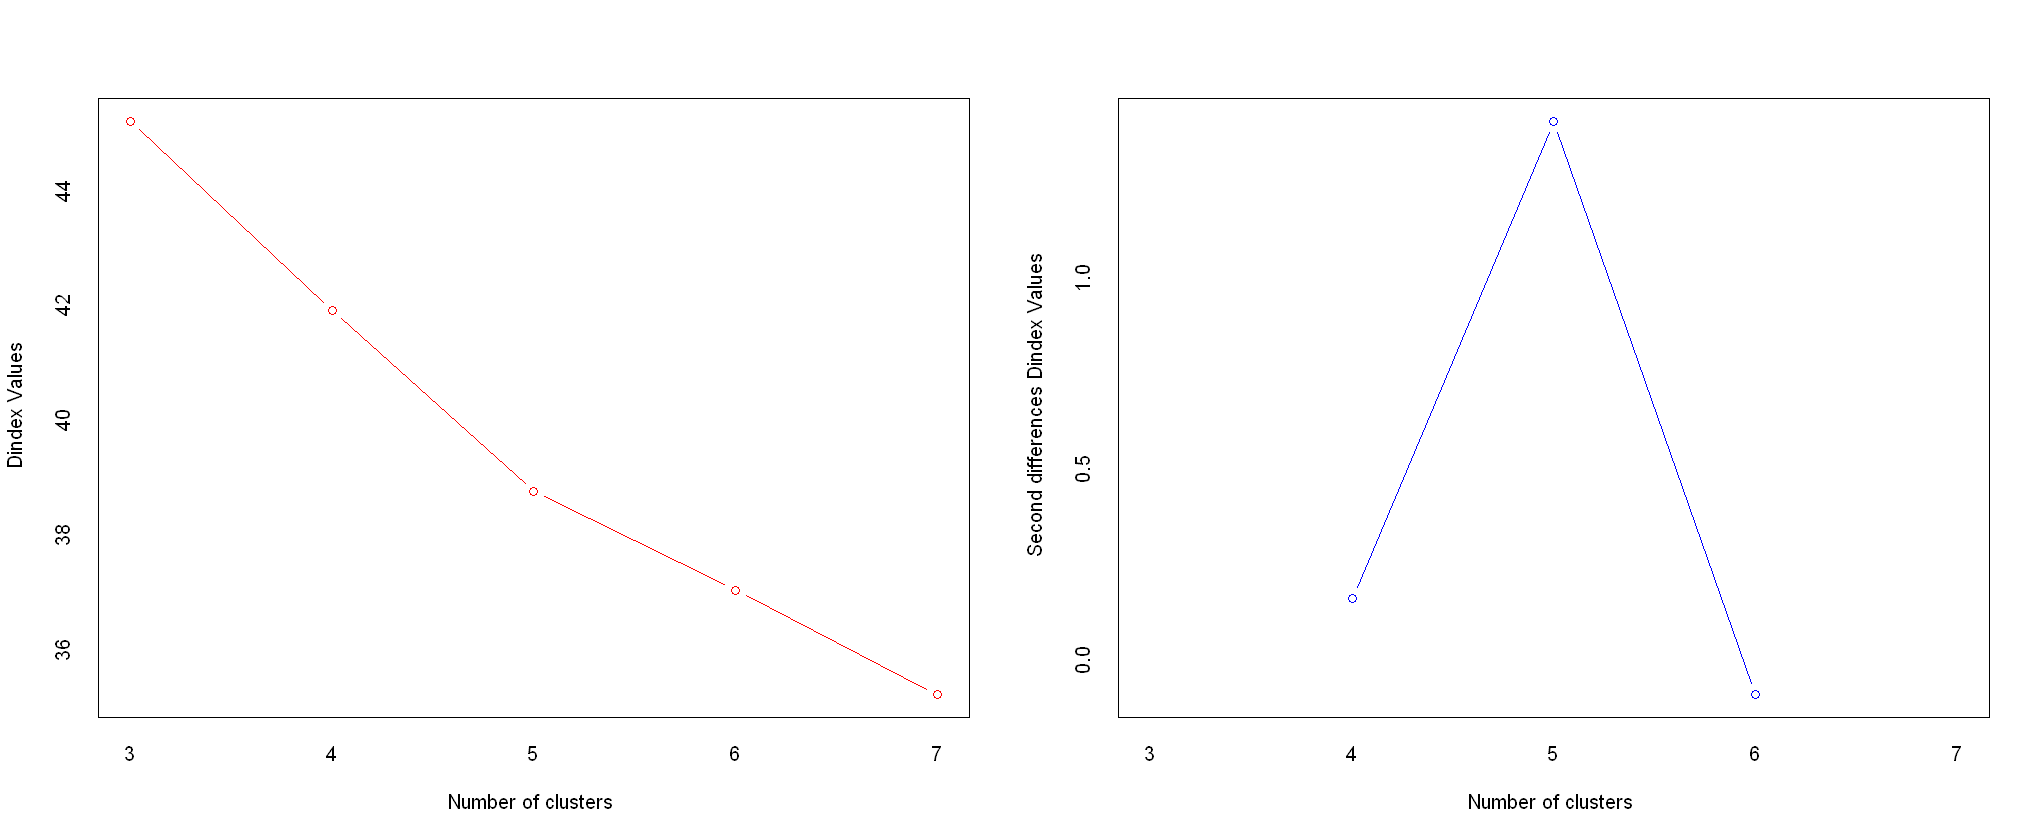

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


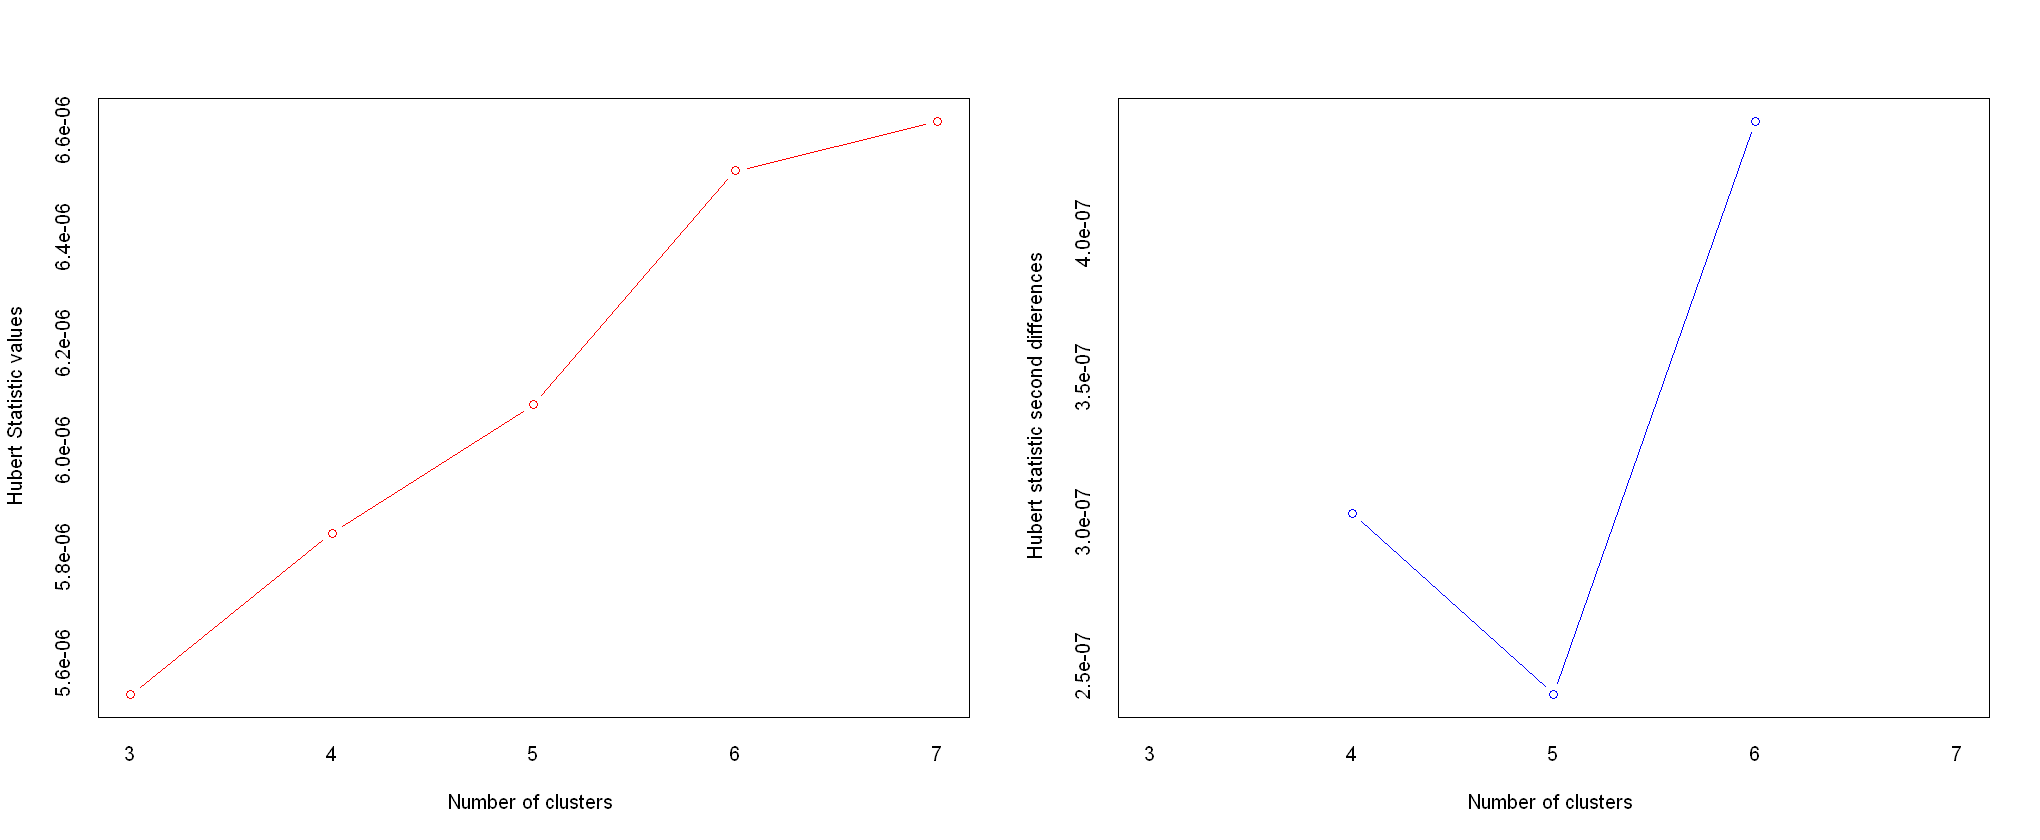

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 13 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 6 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


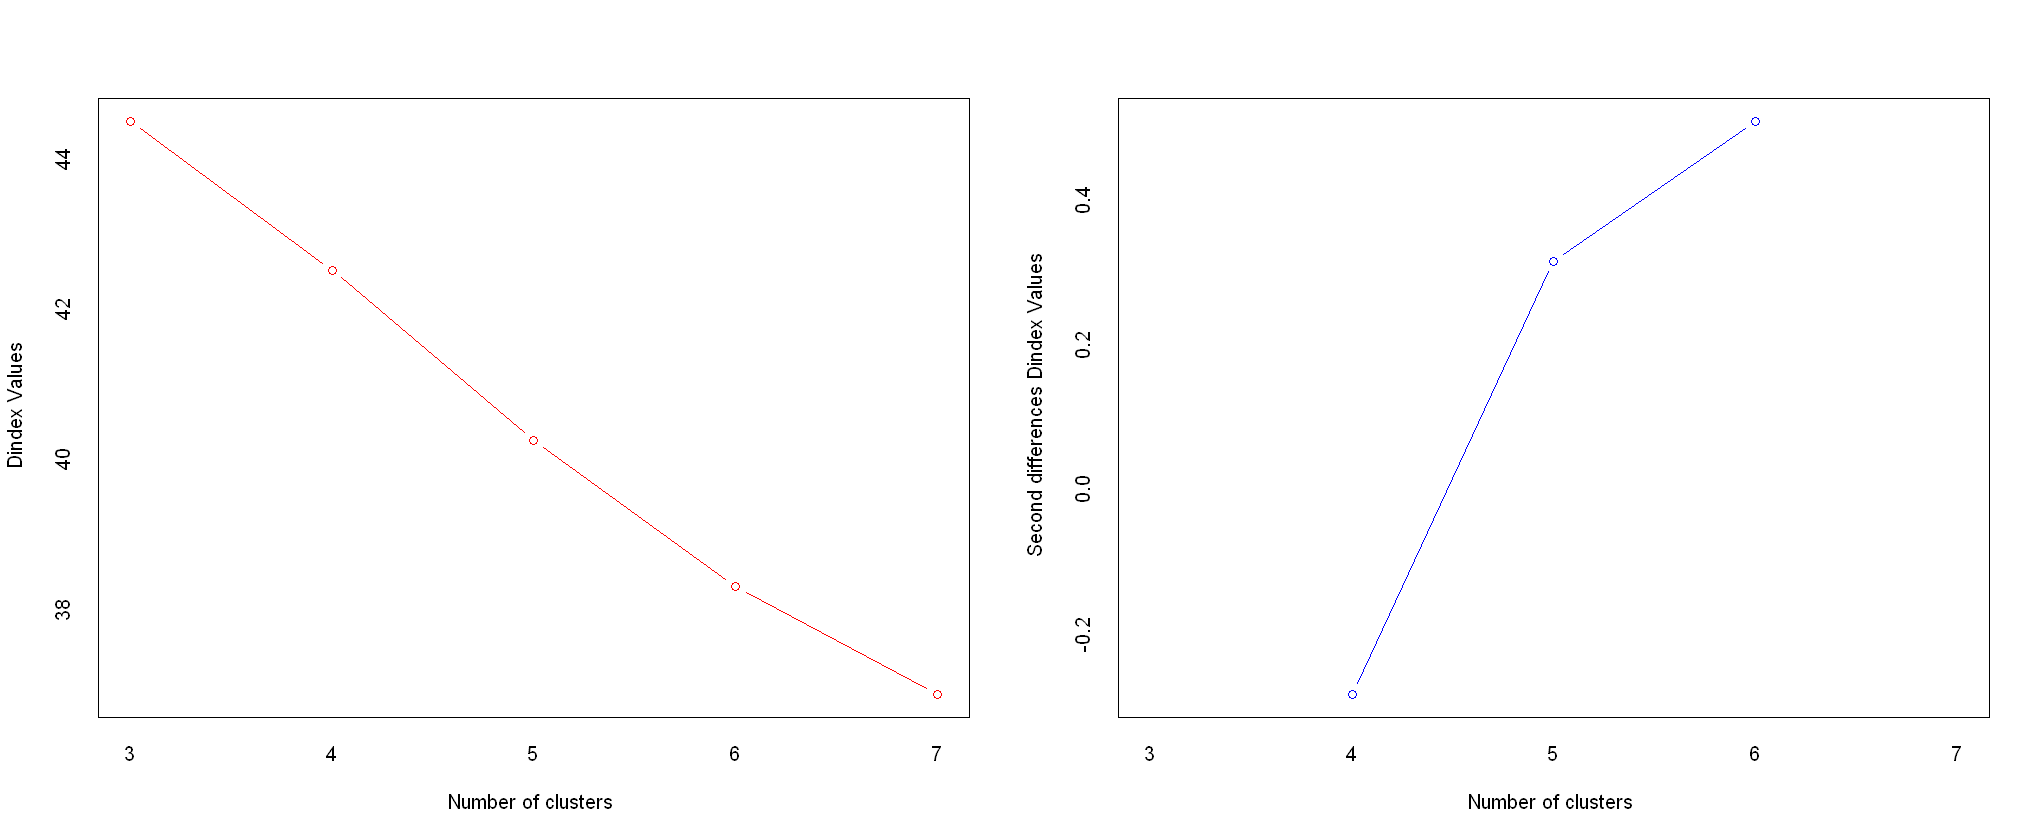

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


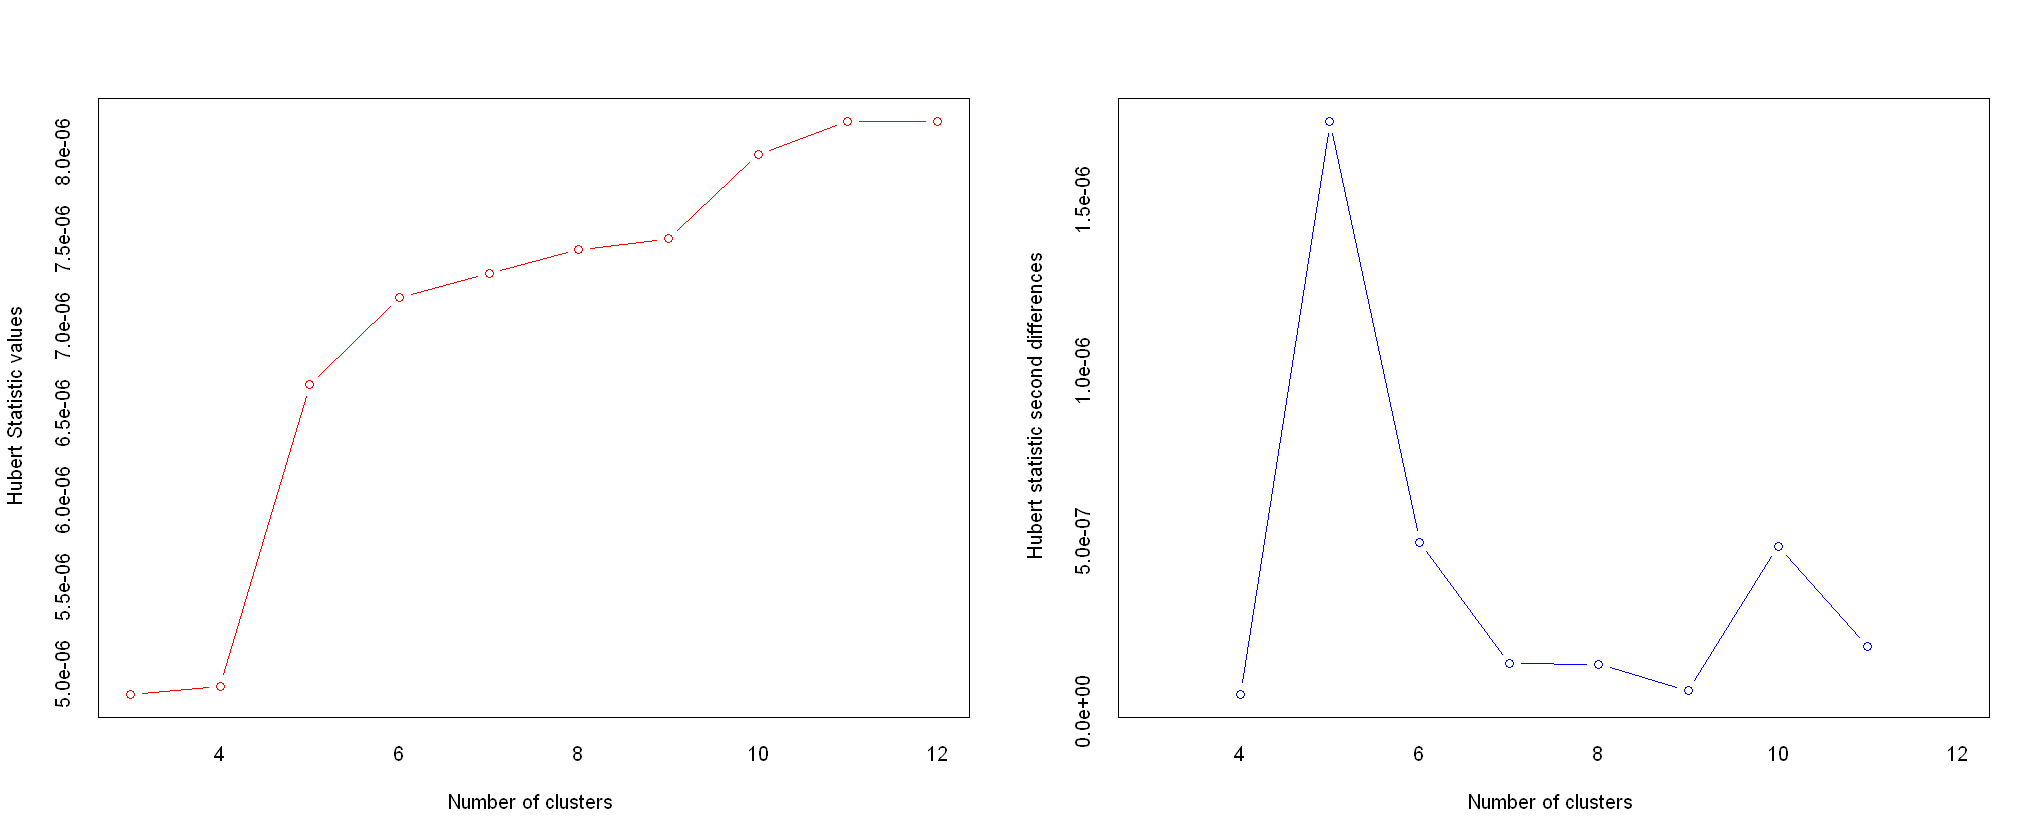

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 11 proposed 5 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 5 proposed 12 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


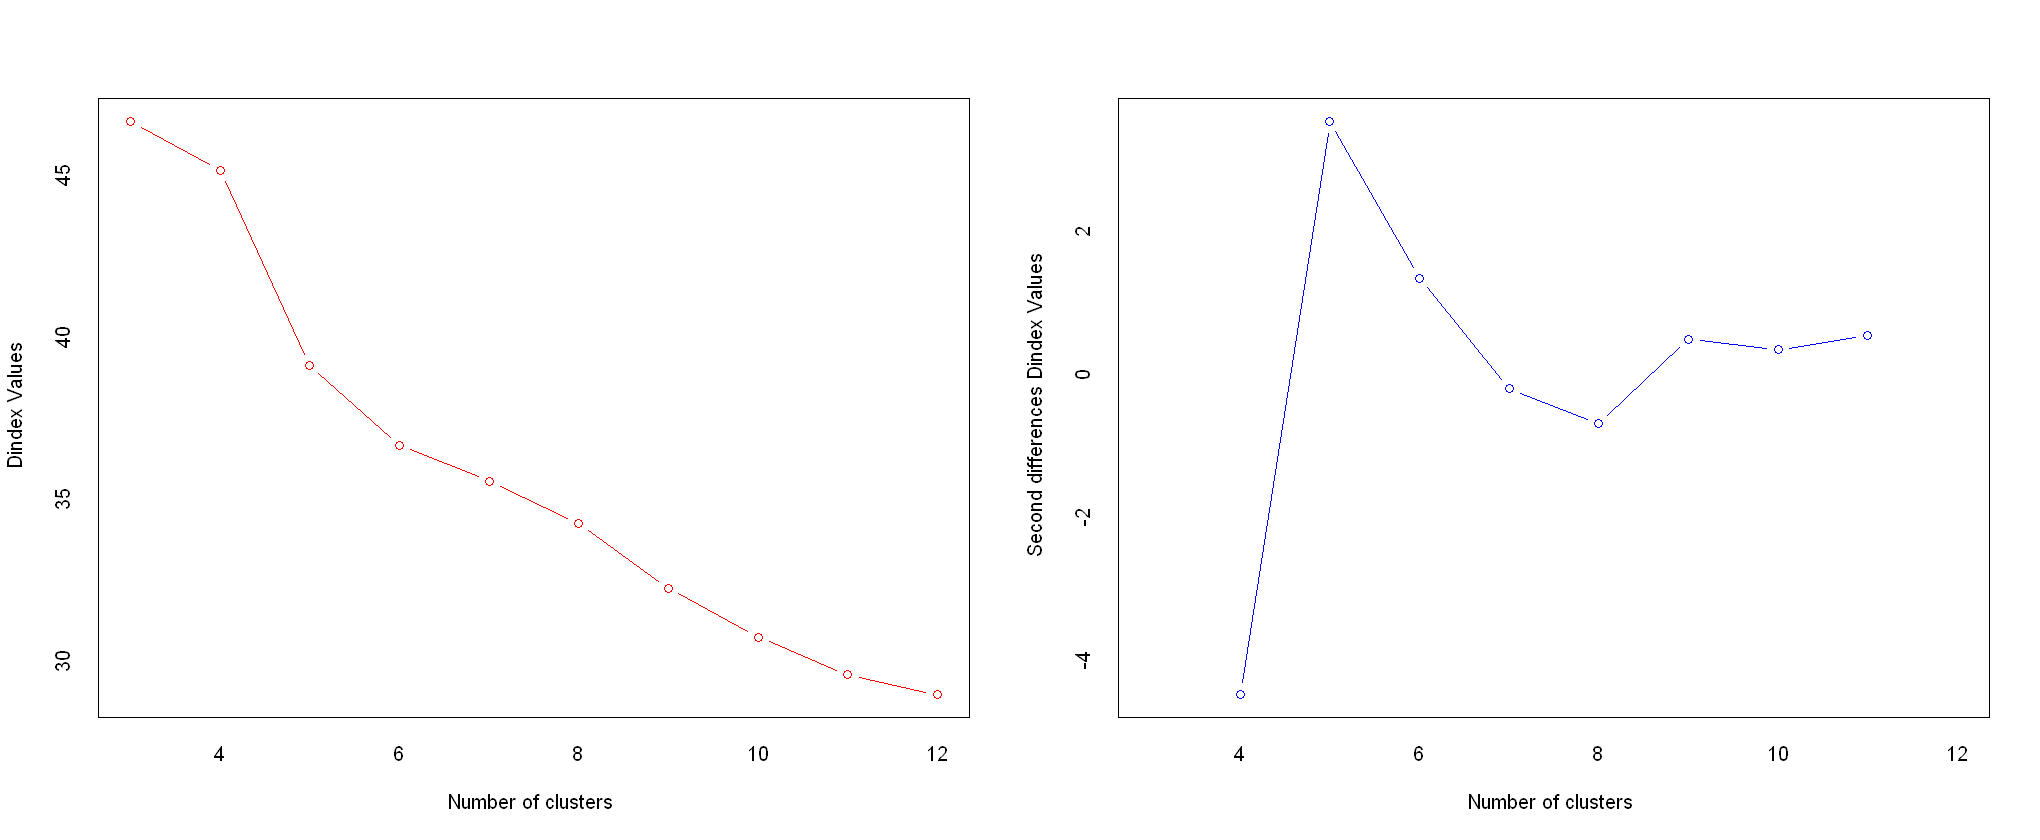

In [60]:
optimald2 = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = "alllong" ,alphaBeale = 0.1)
optimald = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'alllong',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'alllong',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 12, method = "kmeans", index = 'alllong',alphaBeale = 0.1)



Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") {:
"the condition has length > 1 and only the first element will be used"


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 12 proposed  3 as the best number of clusters
* 7 proposed  4 as the best number of clusters
* 3 proposed  5 as the best number of clusters
* 3 proposed  7 as the best number of clusters
* 3 proposed  NA's as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  3 .



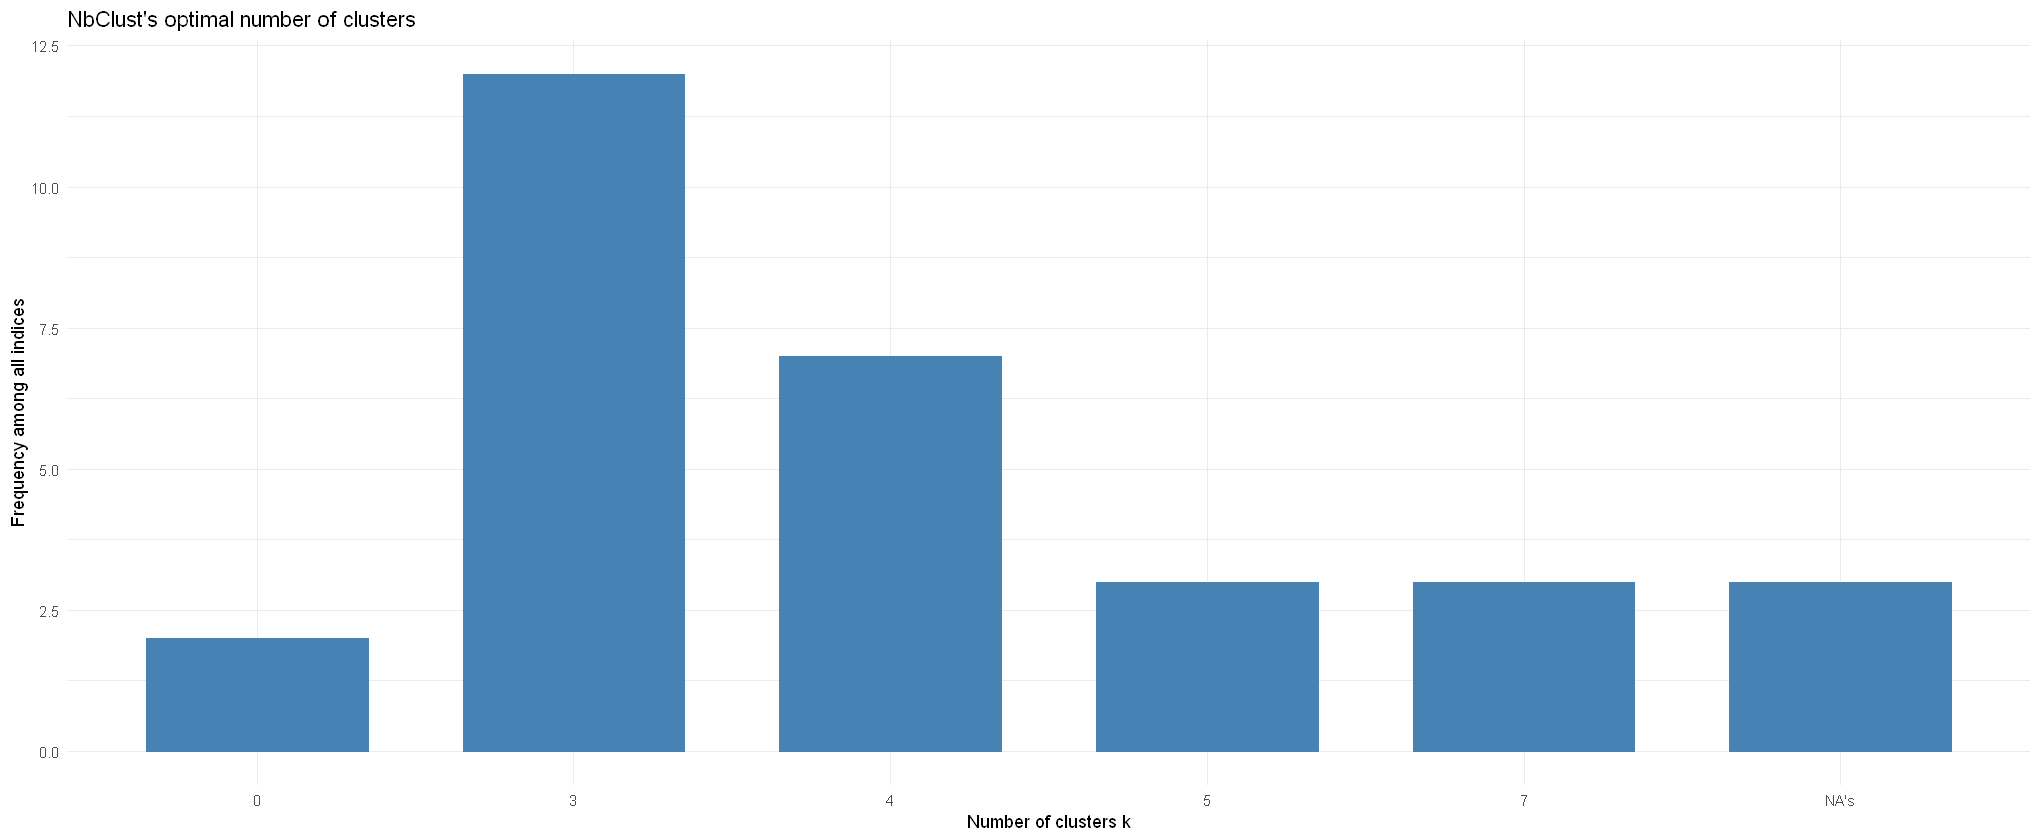

In [36]:
factoextra::fviz_nbclust(optimald2) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a 

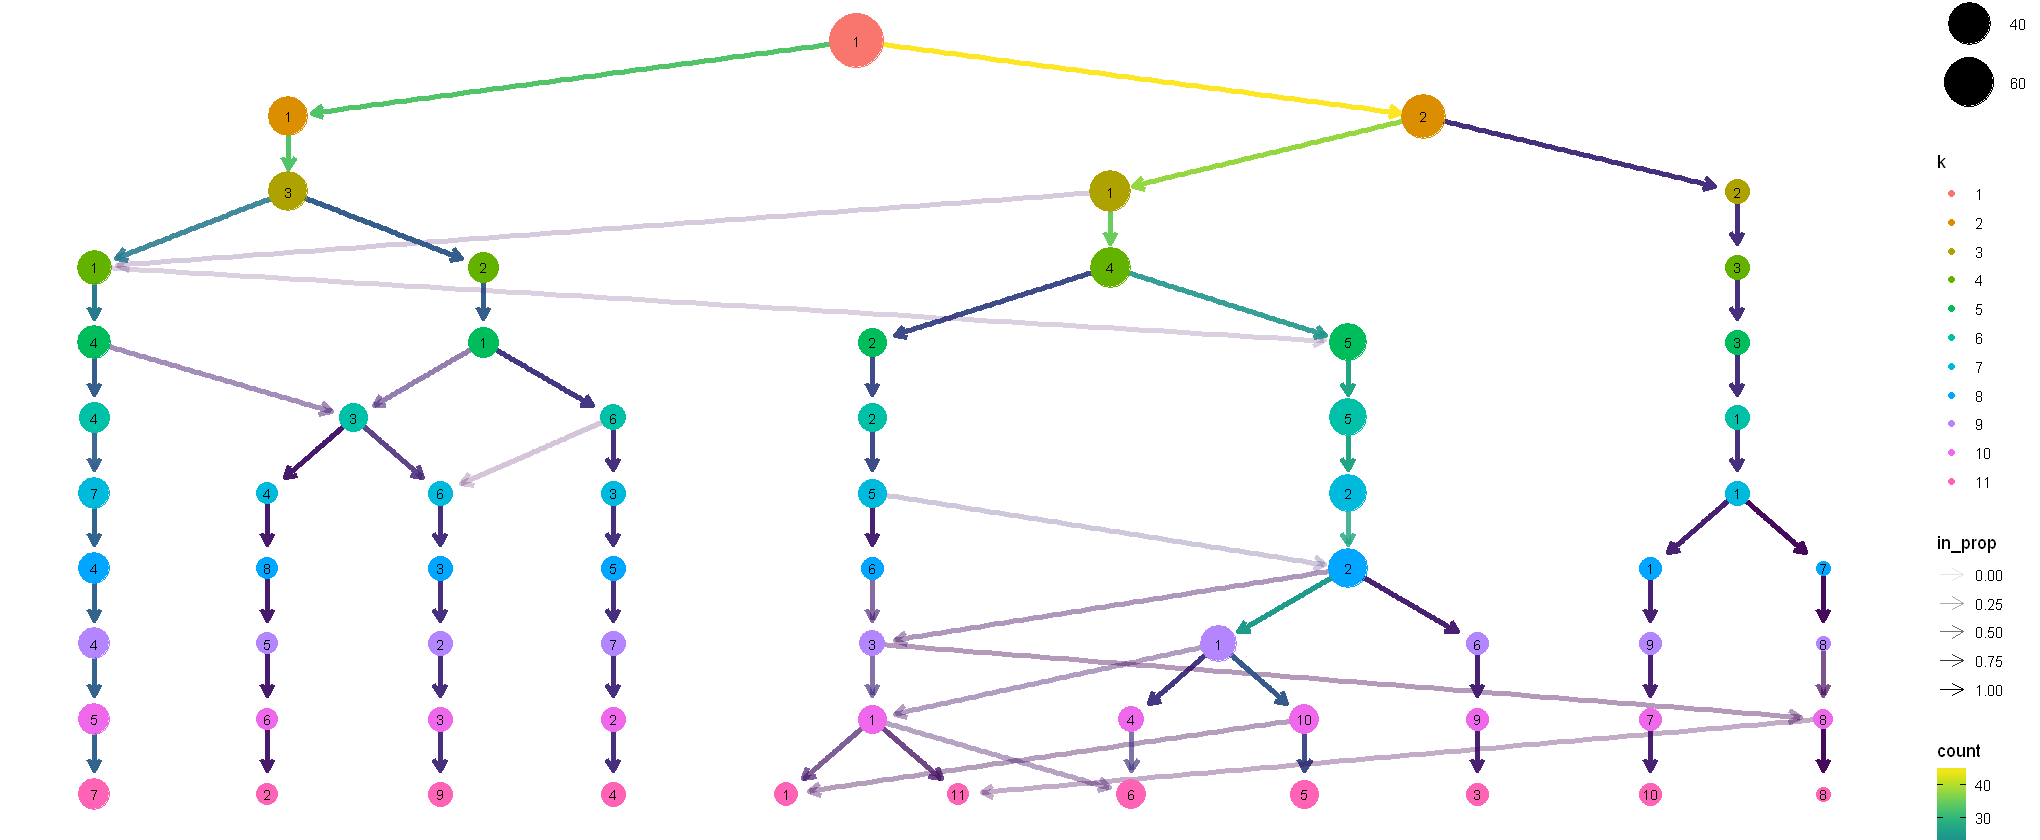

In [63]:
tmp <- NULL
# Comparing from 1 to 7 clusters
for (k in 1:11){
  tmp[k] <- kmeans(df.wa, k, nstart = 30)
}
df <- data.frame(tmp)
# add a prefix to the column names
colnames(df) <- seq(1:11)
colnames(df) <- paste0("k",colnames(df))
# get individual PCA
df.pca <- prcomp(df, center = TRUE, scale. = FALSE)
ind.coord <- df.pca$x
ind.coord <- ind.coord[,1:2]
df <- bind_cols(as.data.frame(df), as.data.frame(ind.coord))
clustree(df, prefix = "k")

In this figure the size of each node corresponds to the number of samples in each cluster, and the arrows are coloured according to the number of samples each cluster receives. A separate set of arrows, the transparent ones, called the incoming node proportion, are also coloured and shows how samples from one group end up in another group — an indicator of cluster instability.
In this graph we see that as we move from k=2 to k=3 a number of species from the lookers-left cluster are reasigned to the third cluster on the right. As we move from k=4 to k=4, 4 to 9, 5 to 10 we see one node with multiple incoming edges an indicator that we over-clustered the data.
It can also be useful to overlay this dimension on other dimensions in the data, particularly those that come from dimensionality reduction techniques. We can do this using the clustree_overlay() function:

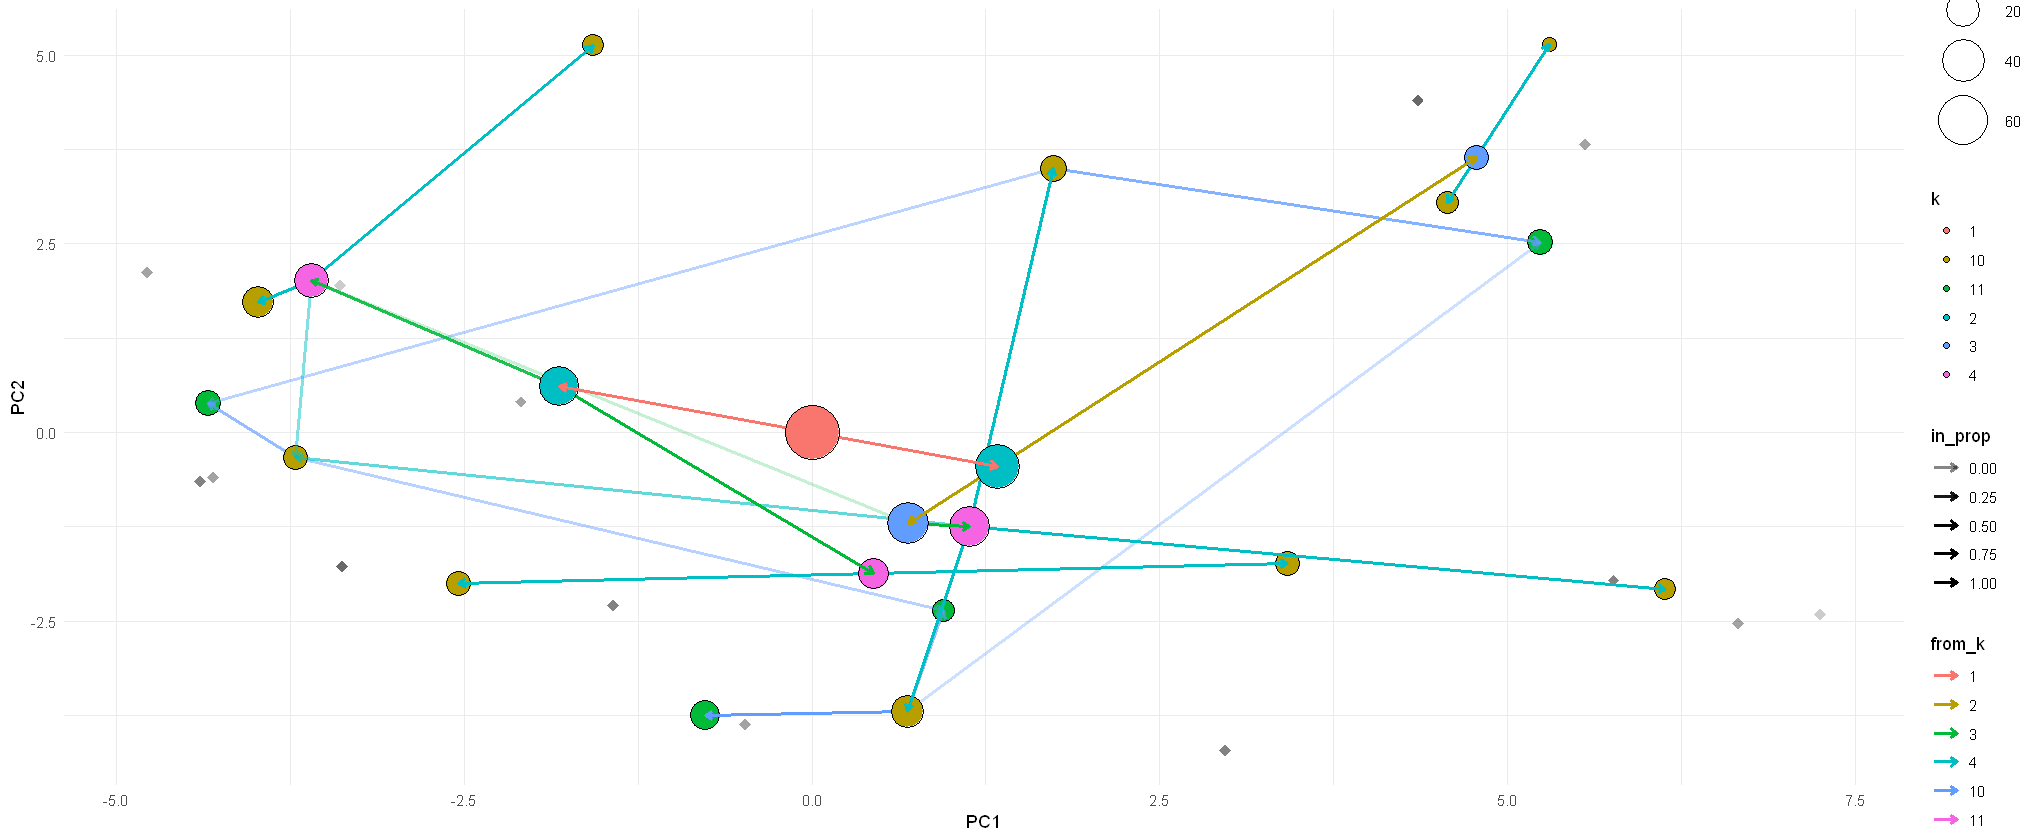

In [53]:
df_subset <- df %>% select(1:4,10:13)
clustree_overlay(df_subset, prefix = "k", x_value = "PC1", y_value = "PC2")

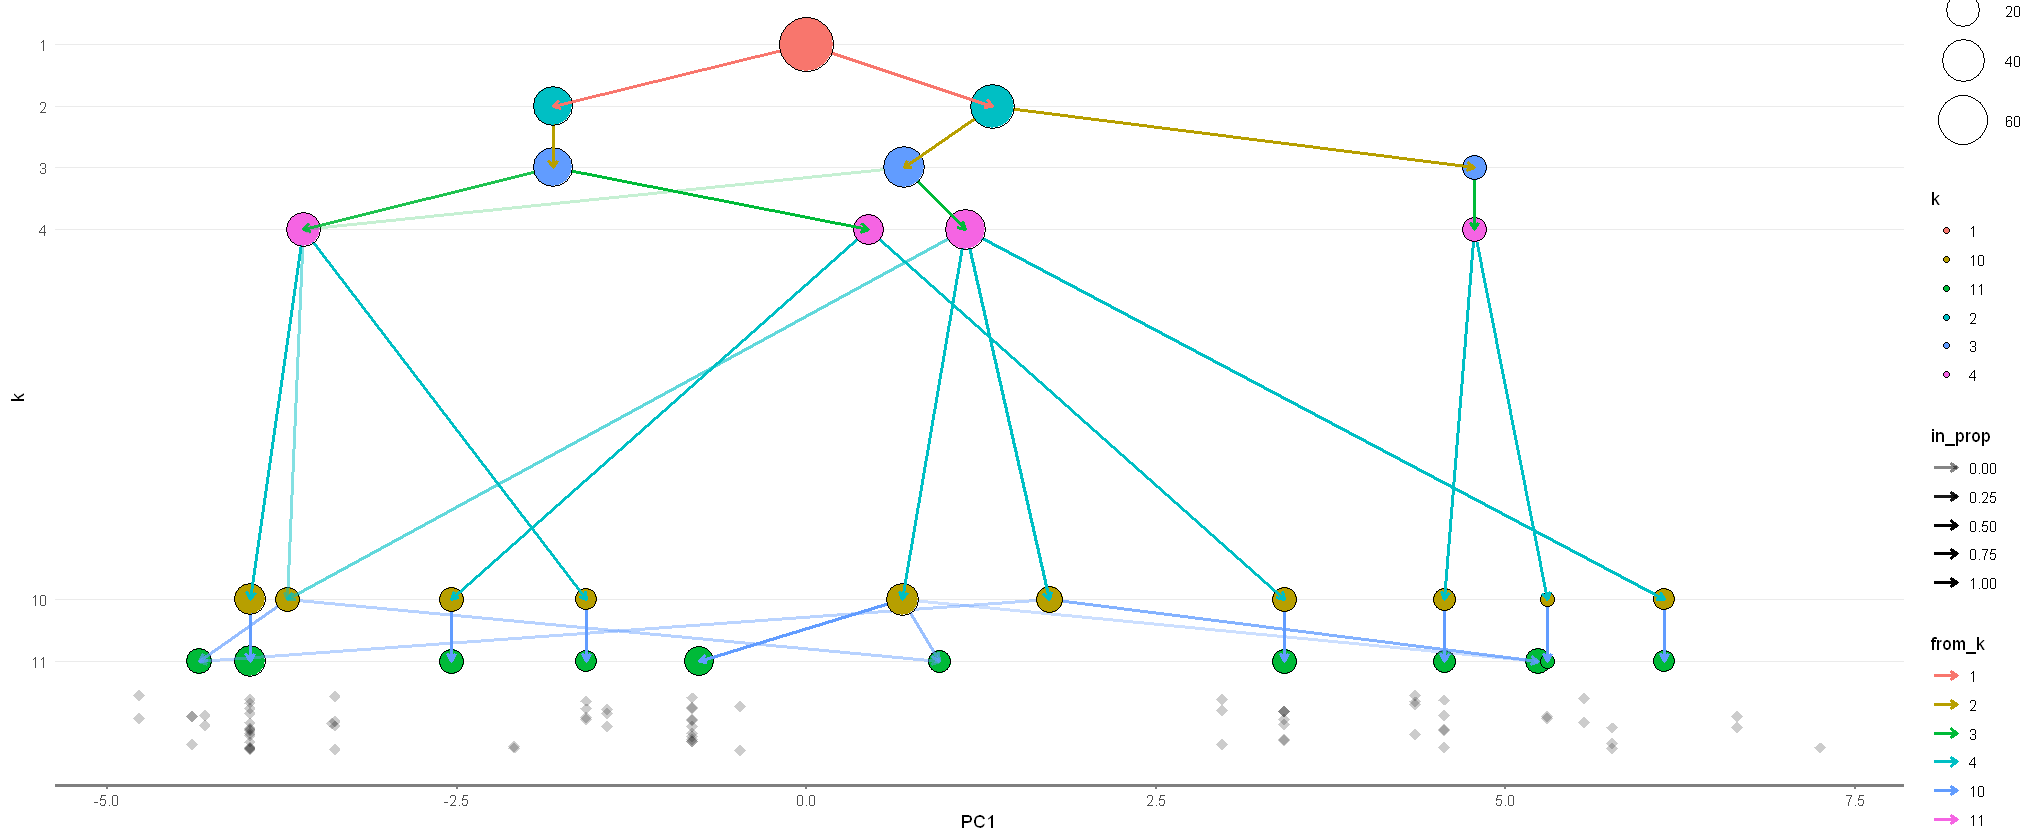

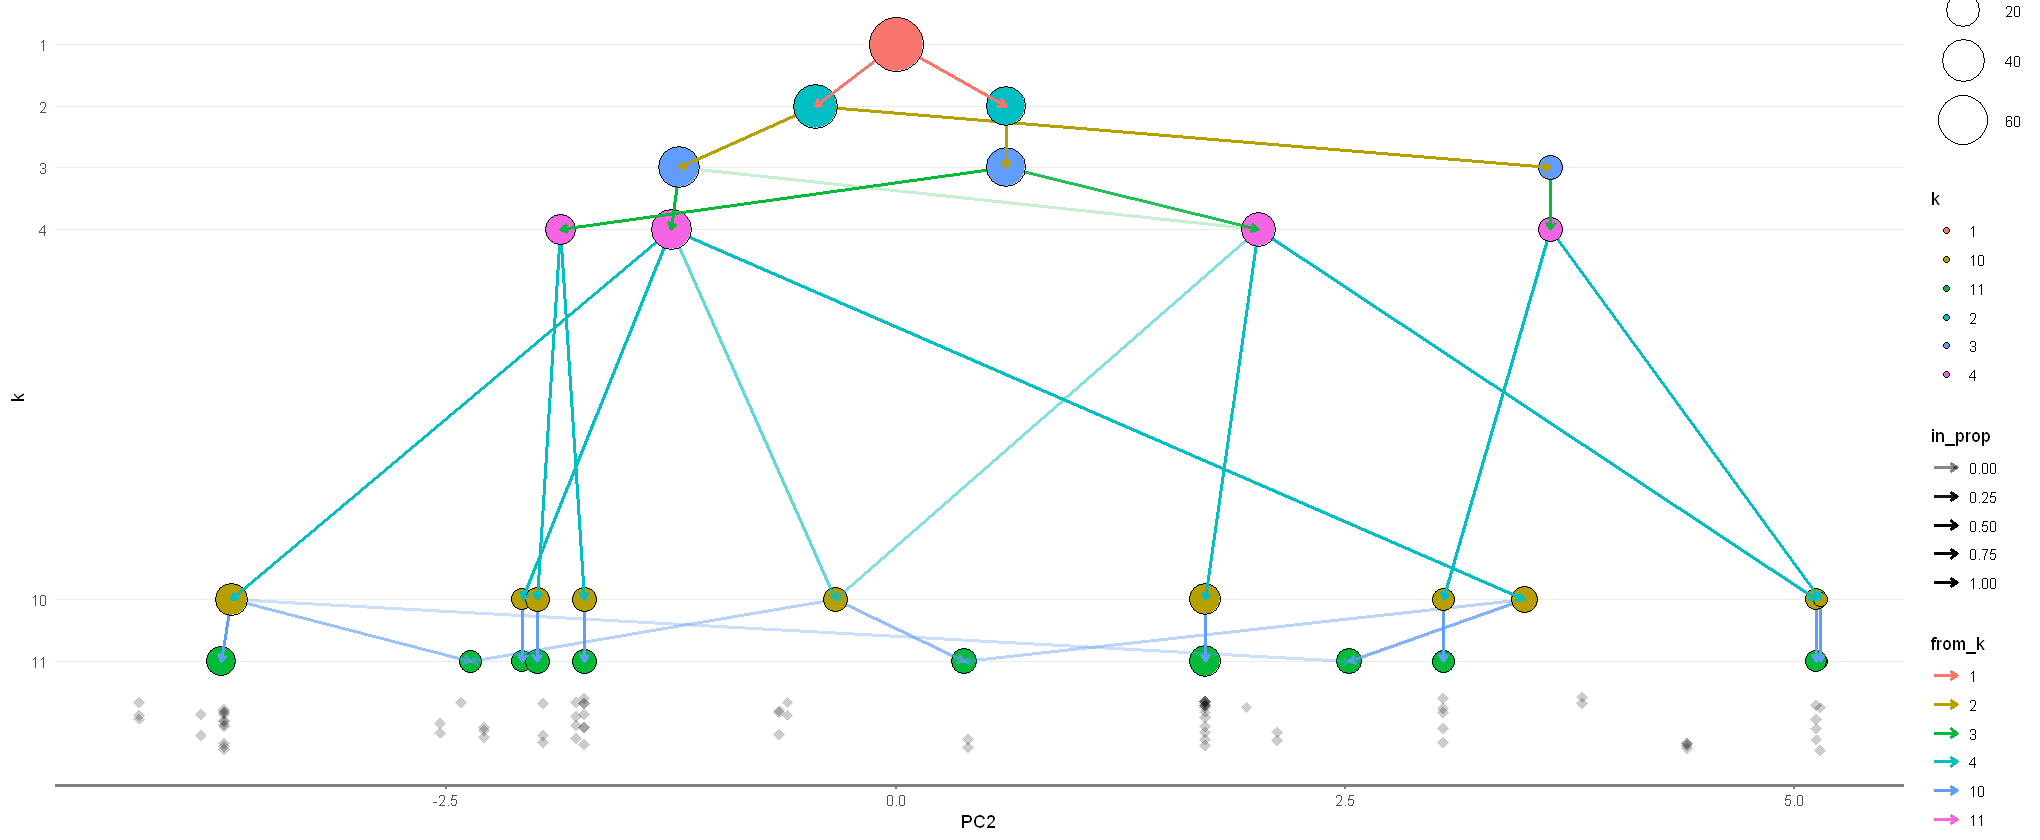

In [54]:
overlay_list <- clustree_overlay(df_subset, prefix = "k", x_value = "PC1",
                                 y_value = "PC2", plot_sides = TRUE)
overlay_list$x_side
overlay_list$y_side

This shows that we can an indication of the correct clustering resolution by examining the edges and we can overly information to assess the quality of the clustering.

List of the optimal index values of the NBClust function

In [64]:
list(optimald2$Best.nc)
list(optimald2$Best.nc[,c(1,2,12, 13, 17, 21, 24)])
#list(optimald$Best.nc)
#list(optimalcomplete$Best.nc)
#list(optimal.kmeans$Best.nc)
list(optimald2$All.index[,c(1,2,12, 13, 17, 21, 24)])
index.d2 <- optimald2$All.index[,c(1,12,13,17,21)]

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Frey,McClain,Gamma,Gplus,Tau,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,3.0000,3.0000,5.0000,7.0000,4.0000,4.000000e+00,4,5.000,4.0000,5.0000,...,4.0000,3.0000,3.0000,7.0000,3.0000,3.0000,0,3.0000,0,7.0000
Value_Index,2.8739,53.6456,2.7899,11.5055,129.0177,3.043139e+71,54393392,6006.373,464.4234,-0.2728,...,1.2414,0.7291,0.8435,37.6397,615.7822,0.2507,0,0.0433,0,0.3358


,KL,CH,DB,Silhouette,Ratkowsky,Frey,Gplus
Number_clusters,3.0000,3.0000,3.000,3.0000,3.0000,4.0000,7.0000
Value_Index,2.8739,53.6456,0.978,0.4093,0.2881,1.2414,37.6397


,KL,CH,DB,Silhouette,Ratkowsky,Frey,Gplus
3,2.8739,53.6456,0.9780,0.4093,0.2881,1.4872,57.1192
4,1.1109,43.8016,1.2870,0.3190,0.2764,1.2414,58.5241
5,1.5027,39.2728,1.5441,0.2353,0.2669,0.5085,49.7609
6,1.0150,35.4889,1.4059,0.2458,0.2547,0.4063,42.2328
7,0.9956,33.3522,1.2399,0.2565,0.2460,0.0228,37.6397


Dev of bar plot determing the best clustering result is 4 cuts.

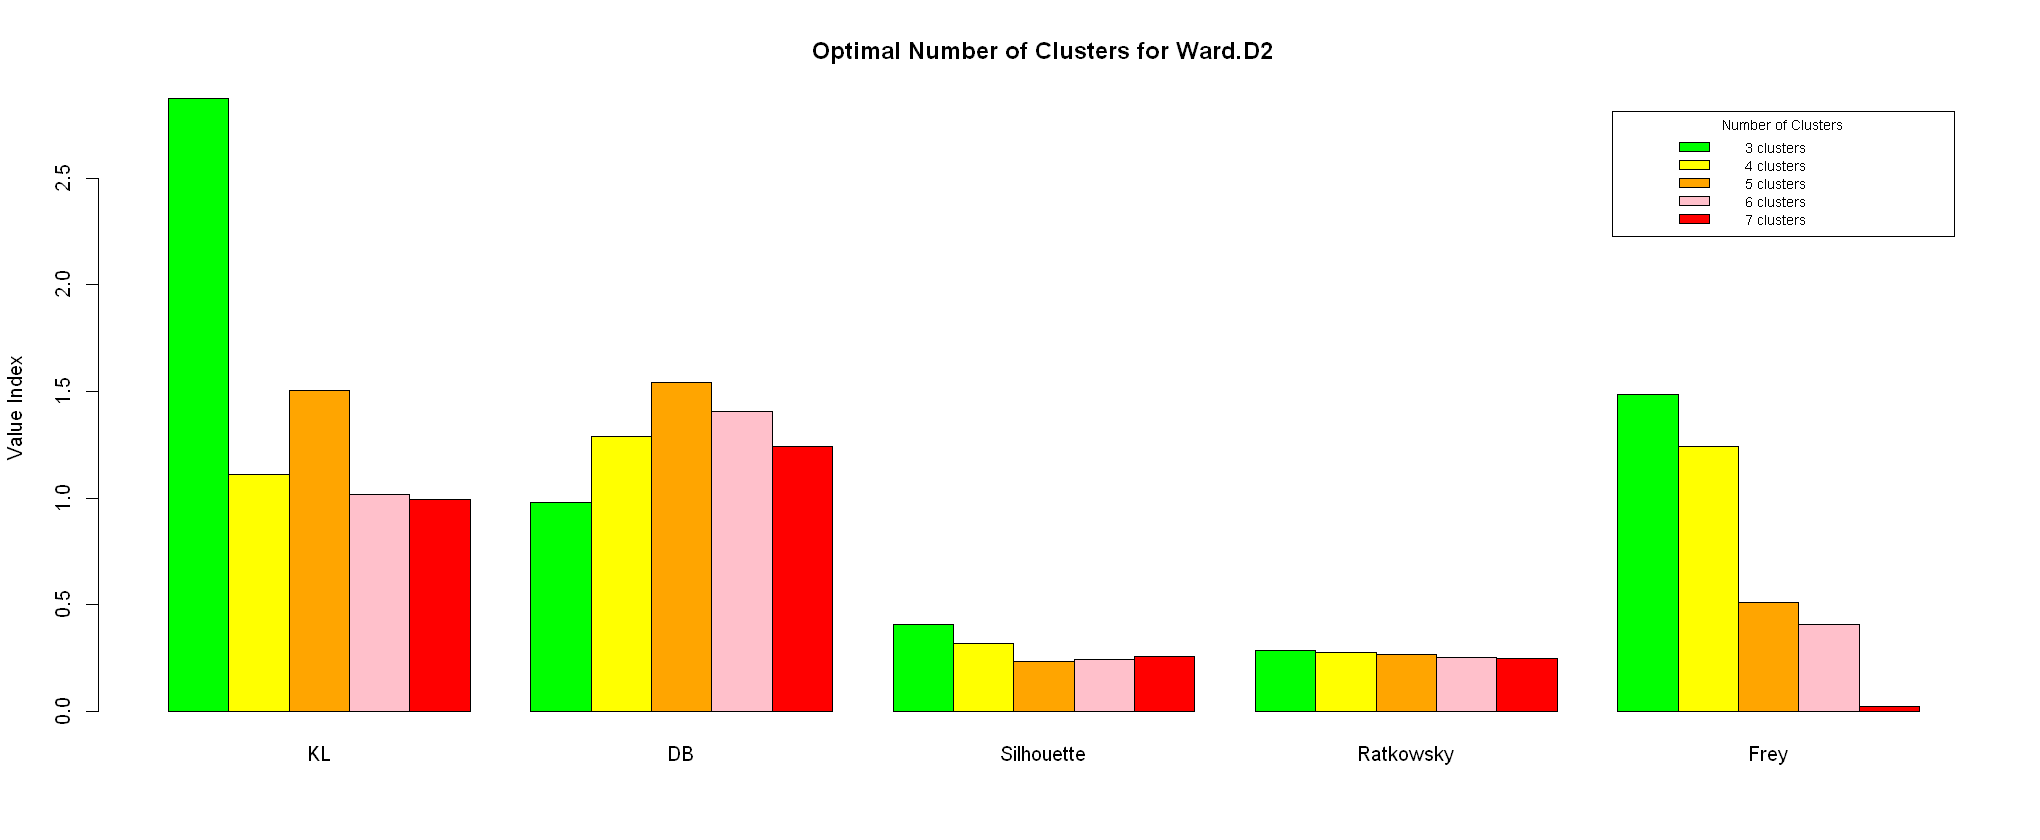

In [38]:
barplot(index.d2, beside = TRUE, main = "Optimal Number of Clusters for Ward.D2",
        col = c("green", "yellow", "orange","pink","red"),
        ylab = "Value Index", legend = c("3 clusters", "4 clusters", "5 clusters","6 clusters","7 clusters"), 
        args.legend = list(title = "Number of Clusters", cex = .7))

Cutting at different tree levels 4 which is the optimal for Ward.D2

In [39]:
clusters_wa <- cutree(hc.ward2,3)     
dfsimple$clusters <- cutree(hc.ward2,3)
head(dfsimple)
write_xlsx(dfsimple , 'C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfsimple.xlsx')

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2


# Fancy Clustering Graph Majority 

cluster,n
<int>,<int>
1,38
2,33
3,7


[[1]]
 [1] "Afghanistan"               "Angola"                   
 [3] "Benin"                     "Burkina Faso"             
 [5] "Burundi"                   "Cameroon"                 
 [7] "Central African Republic"  "Chad"                     
 [9] "Congo"                     "Congo Democratic Republic"
[11] "Cote d'Ivoire"             "Eritrea"                  
[13] "Eswatini"                  "Ethiopia"                 
[15] "Gambia"                    "Ghana"                    
[17] "Guinea"                    "Haiti"                    
[19] "Kenya"                     "Lesotho"                  
[21] "Liberia"                   "Madagascar"               
[23] "Malawi"                    "Mali"                     
[25] "Mauritania"                "Mozambique"               
[27] "Myanmar"                   "Niger"                    
[29] "Nigeria"                   "Papua New Guinea"         
[31] "Rwanda"                    "Sao Tome and Principe"    
[33] "Sierra Leone"              "Tanzania"                 
[35] "Togo"                      "Uganda"                   
[37] "Zambia"                    "Zimbabwe"                 

[[2]]
 [1] "Albania"            "Armenia"            "Azerbaijan"        
 [4] "Bangladesh"         "Bolivia"            "Colombia"          
 [7] "Comoros"            "Dominican Republic" "Egypt"             
[10] "Gabon"              "Guatemala"          "Guyana"            
[13] "Honduras"           "India"              "Indonesia"         
[16] "Jordan"             "Kazakhstan"         "Kyrgyz Republic"   
[19] "Maldives"           "Namibia"            "Nepal"             
[22] "Nicaragua"          "Pakistan"           "Peru"              
[25] "Philippines"        "Senegal"            "South Africa"      
[28] "Tajikistan"         "Timor-Leste"        "Turkey"            
[31] "Turkmenistan"       "Uzbekistan"         "Yemen"             

[[3]]
[1] "Brazil"   "Cambodia" "Moldova"  "Morocco"  "Paraguay" "Ukraine"  "Vietnam"

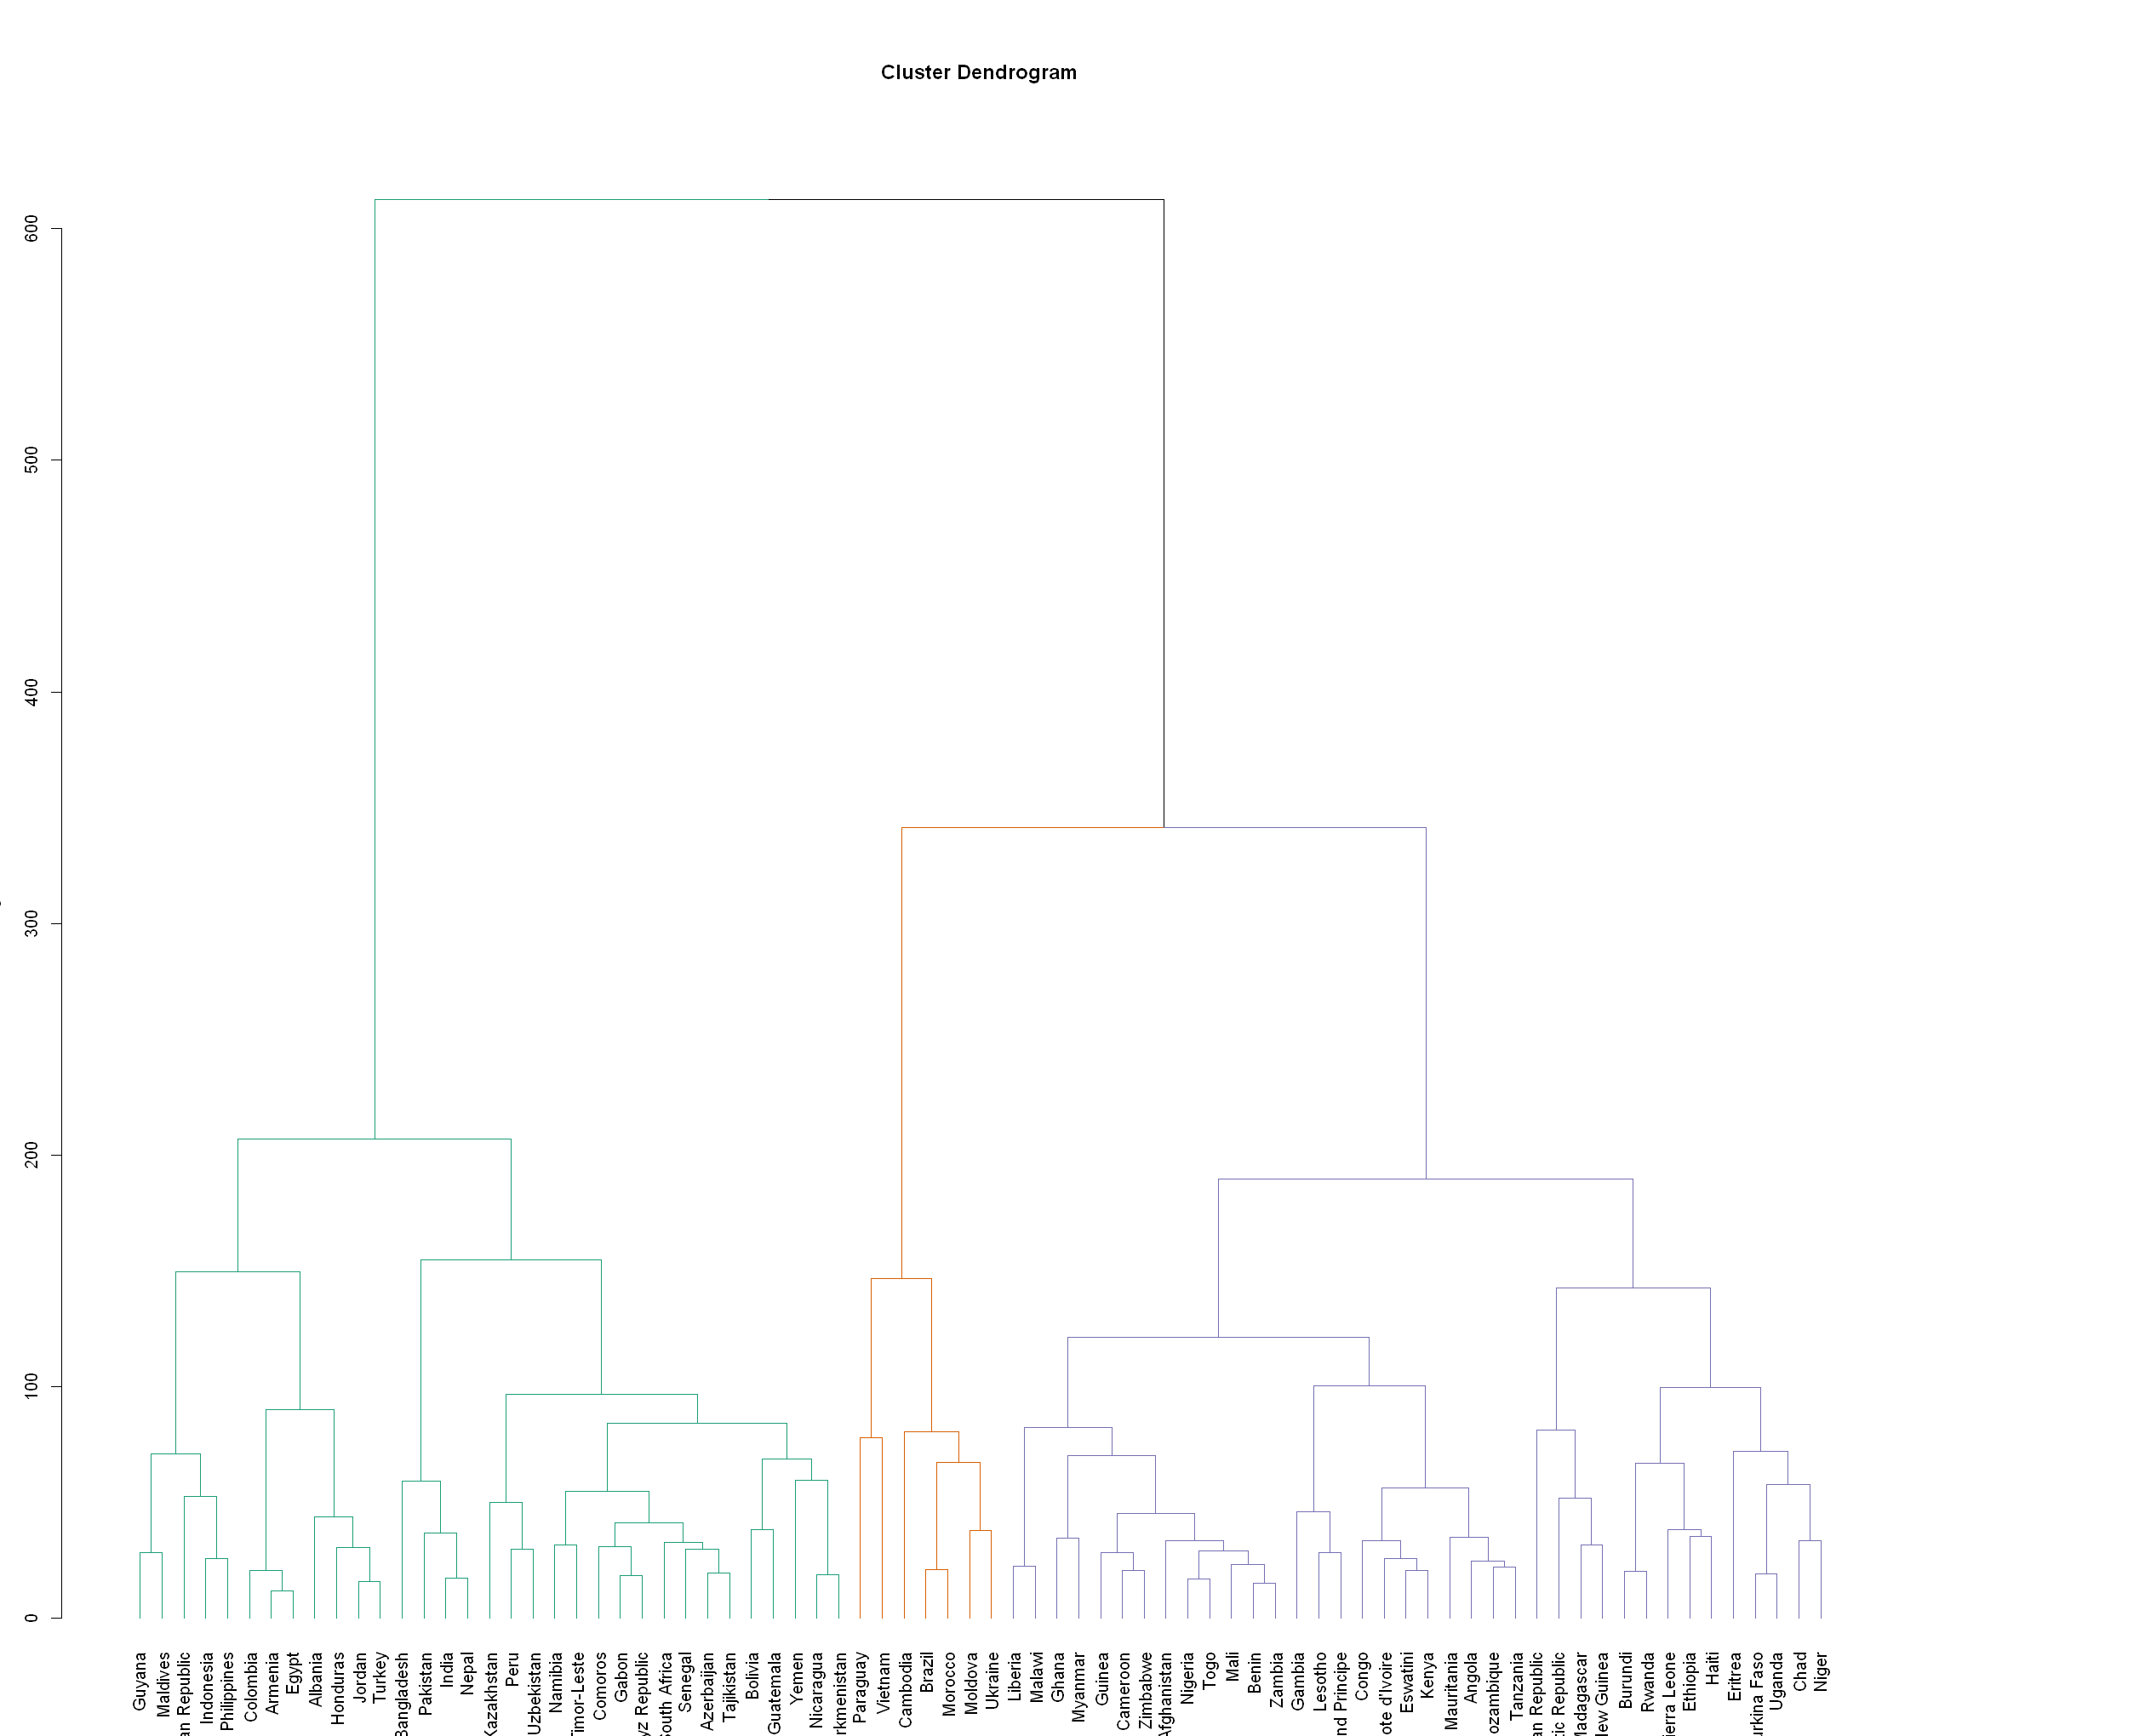

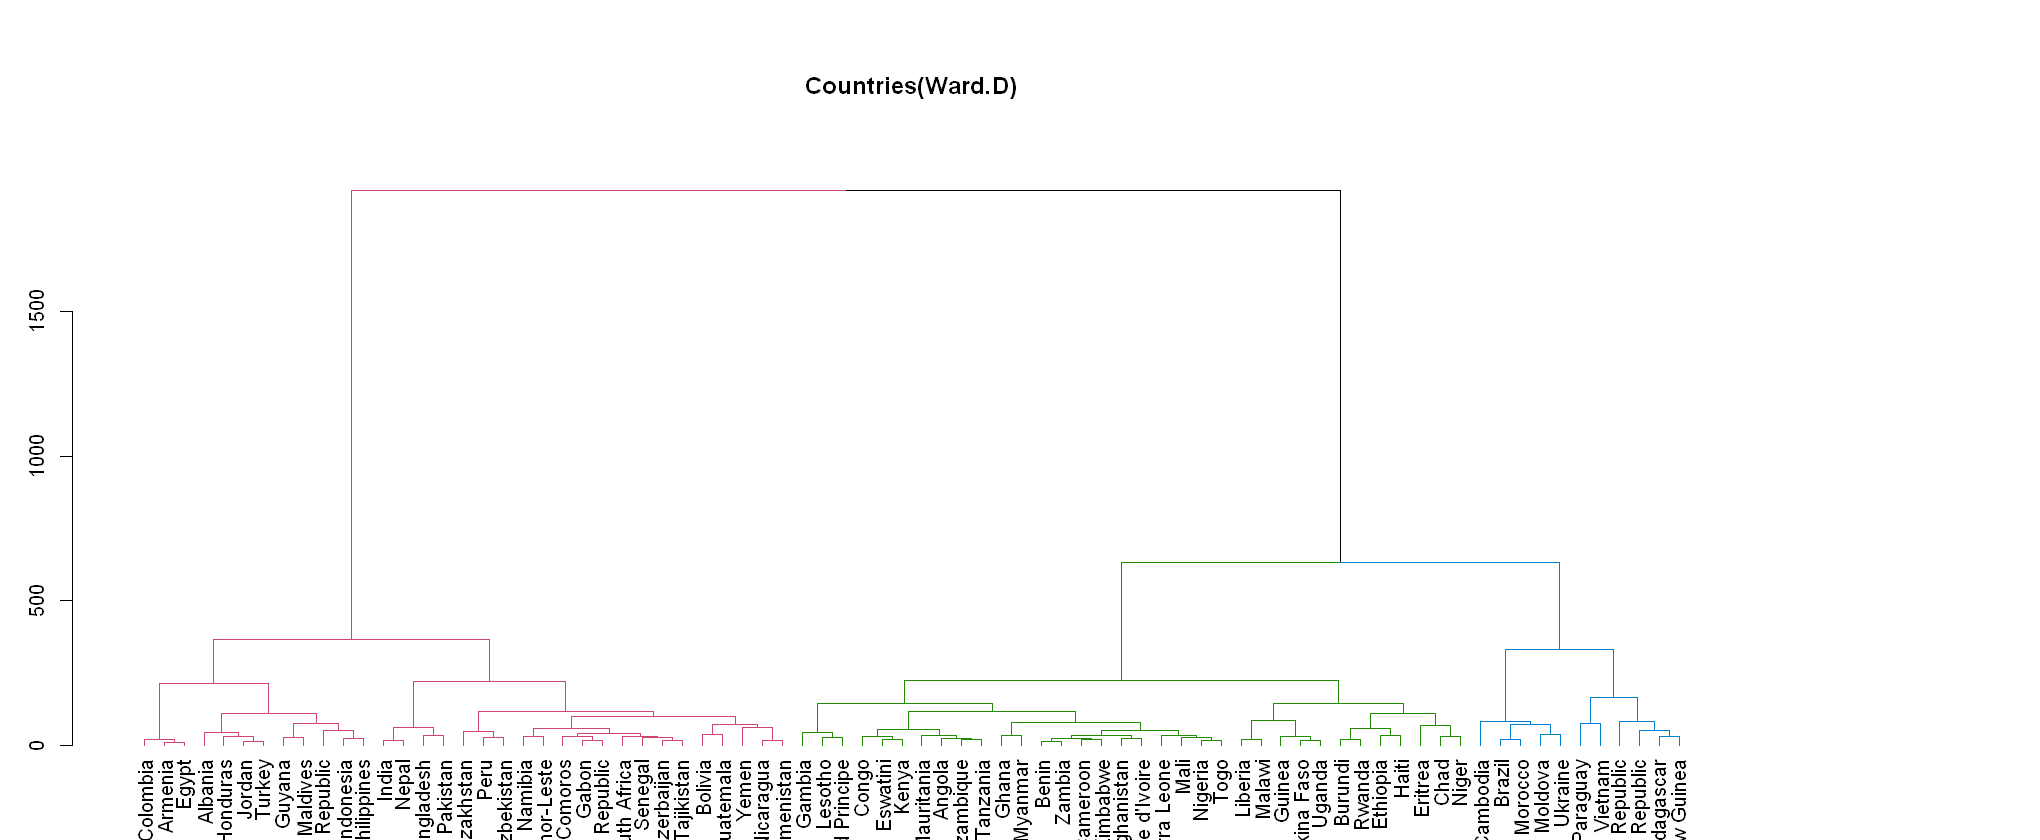

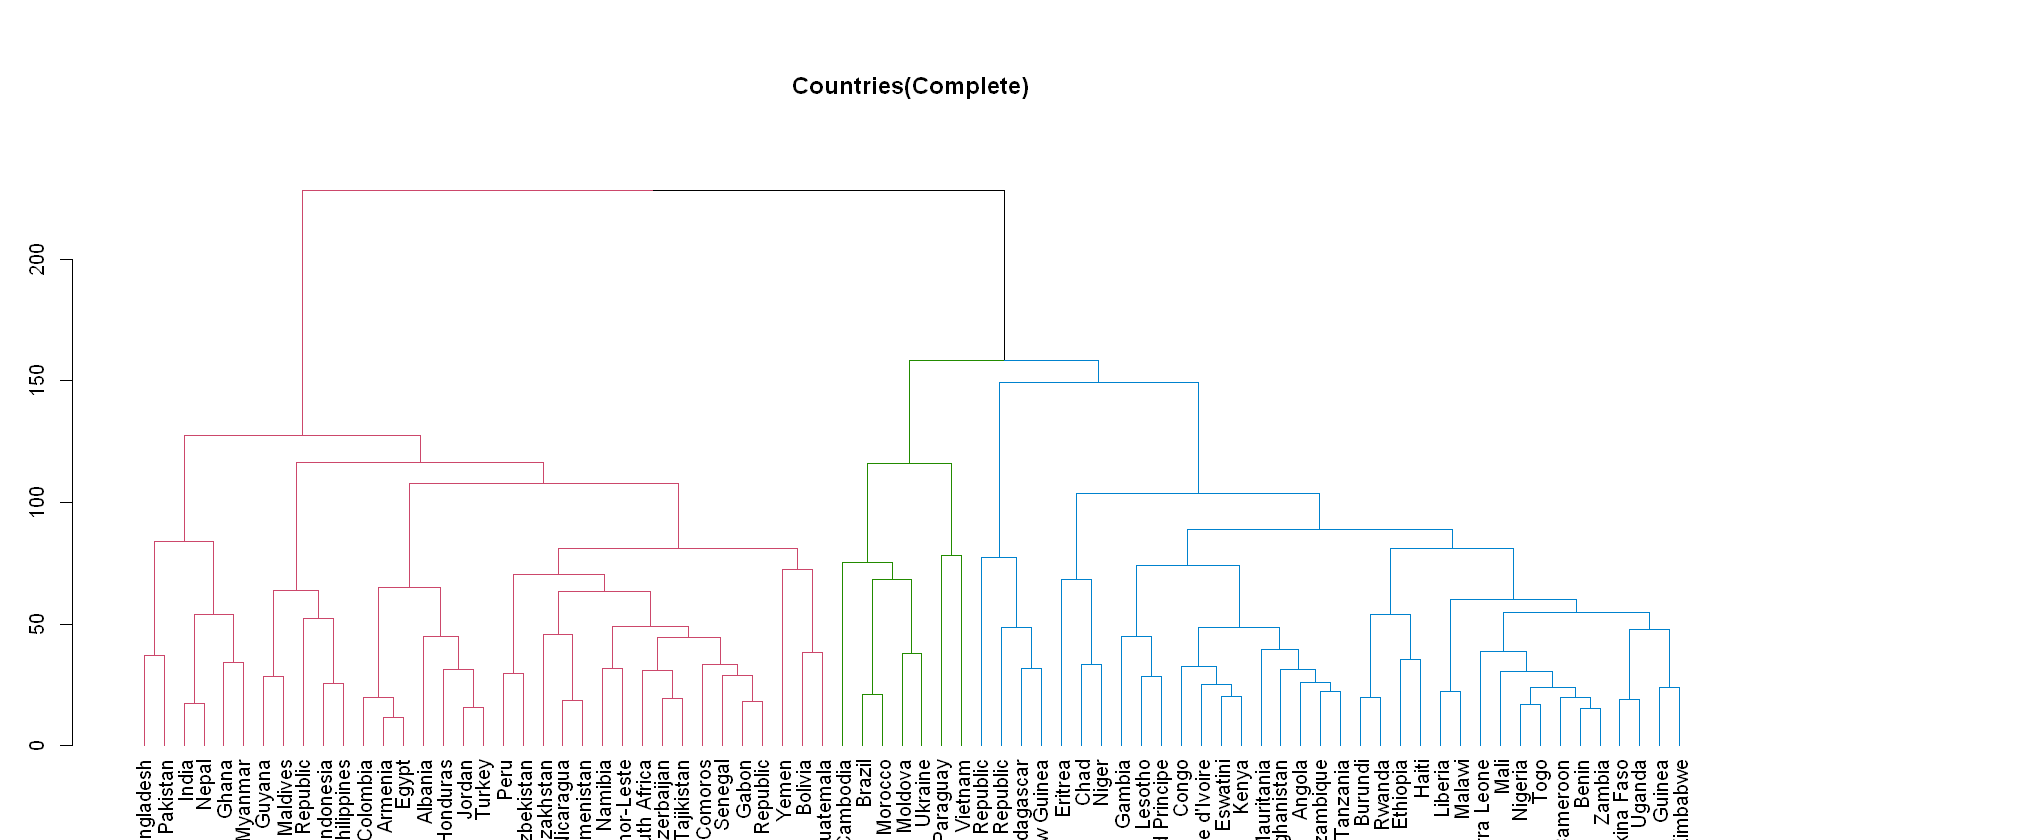

In [84]:
dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=3, col = c("#1b9e77","#d95f02","#7570b3"))
labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=21, repr.plot.height=17)
par(mar = c(3,3,7,12))
par(cex=1)
plot(dend, main="Cluster Dendrogram", xlab="", 
     ylab="Height",horiz=FALSE )


df.wa.d2.avg <- mutate(df.wa, cluster = clusters_wa)
count(df.wa.d2.avg, cluster)

sapply(unique(clusters_wa),function(g)dfsimple$Country[clusters_wa == g])

dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=3)
labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Ward.D)", xlab="", 
     ylab="", cex=.5,  )

dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=3)
labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Complete)", xlab="", 
     ylab="", cex=.5,  )
   


# K-Mean Clustering in R

List of 9
 $ cluster     : int [1:78] 2 1 2 1 1 1 2 1 2 2 ...
 $ centers     : num [1:2, 1:22] 7.76 14.68 9.25 15.01 1.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:22] "ptap" "bore" "pspr" "uspr" ...
 $ totss       : num 417836
 $ withinss    : num [1:2] 77166 153053
 $ tot.withinss: num 230219
 $ betweenss   : num 187618
 $ size        : int [1:2] 33 45
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 2 clusters of sizes 33, 45

Cluster means:
       ptap      bore     pspr      uspr     pwel      uwel     surw     tles
1  7.760606  9.245455 1.703030 0.9545455 2.060606  2.427273 2.672727 16.41818
2 14.684444 15.008889 4.173333 5.6088889 9.433333 10.042222 6.922222 44.39778
       tmor     rain      phom     imws      pipy     truc      ctan      bott
1  2.769697 3.290909 33.460606 89.81818 14.506061 2.139394 0.5060606 13.209091
2 14.168889 2.040000  9.135556 70.97778  8.486667 0.900000 0.5155556  1.291111
      uiws      othw     iwsp     basw     liws     watp
1 10.09091 0.6121212 76.12424 87.60606 1.678788 80.09091
2 26.76222 0.3600000 22.11333 51.92444 7.902222 24.70667

Clustering vector:
 [1] 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 1 2 2 1 2 1 2 1 1 1 1 1 2
[39] 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 1 2 2 1 1 2 2 1 2 1 1 2 1 2 1 1 2 2 1 2 1
[77] 2 2

Within cluster sum of squares by cluster:
[1]  77165.62 153053.04
 (between_SS / total_SS =  44.9 %

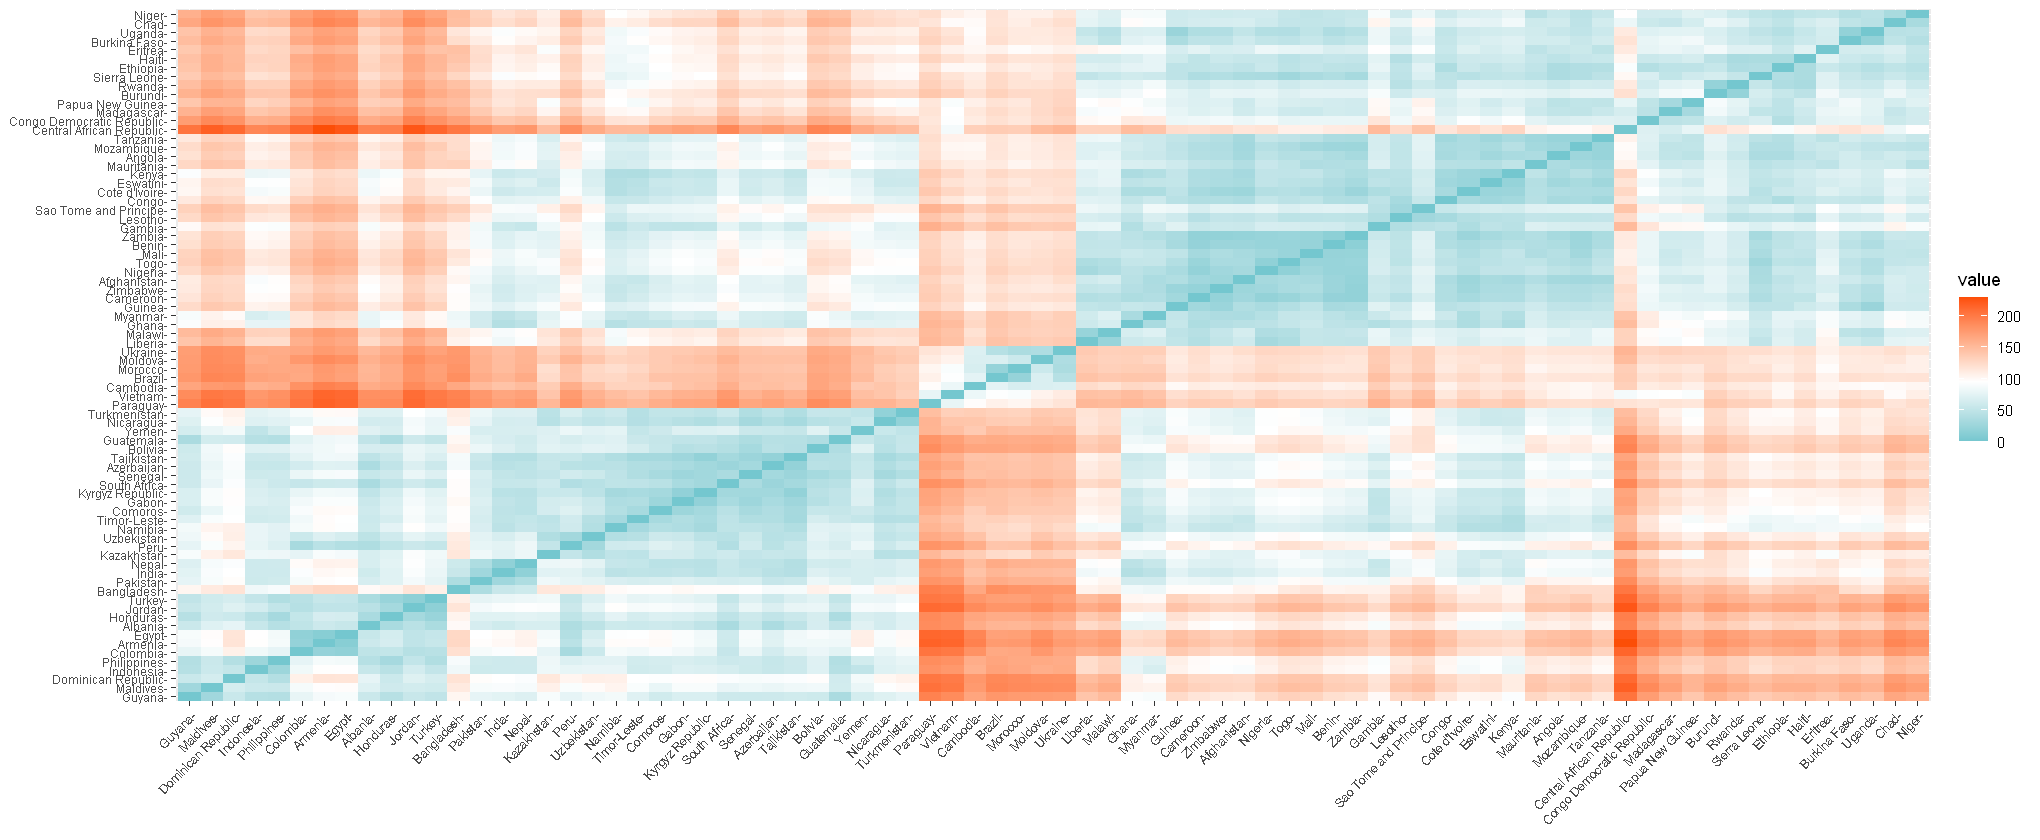

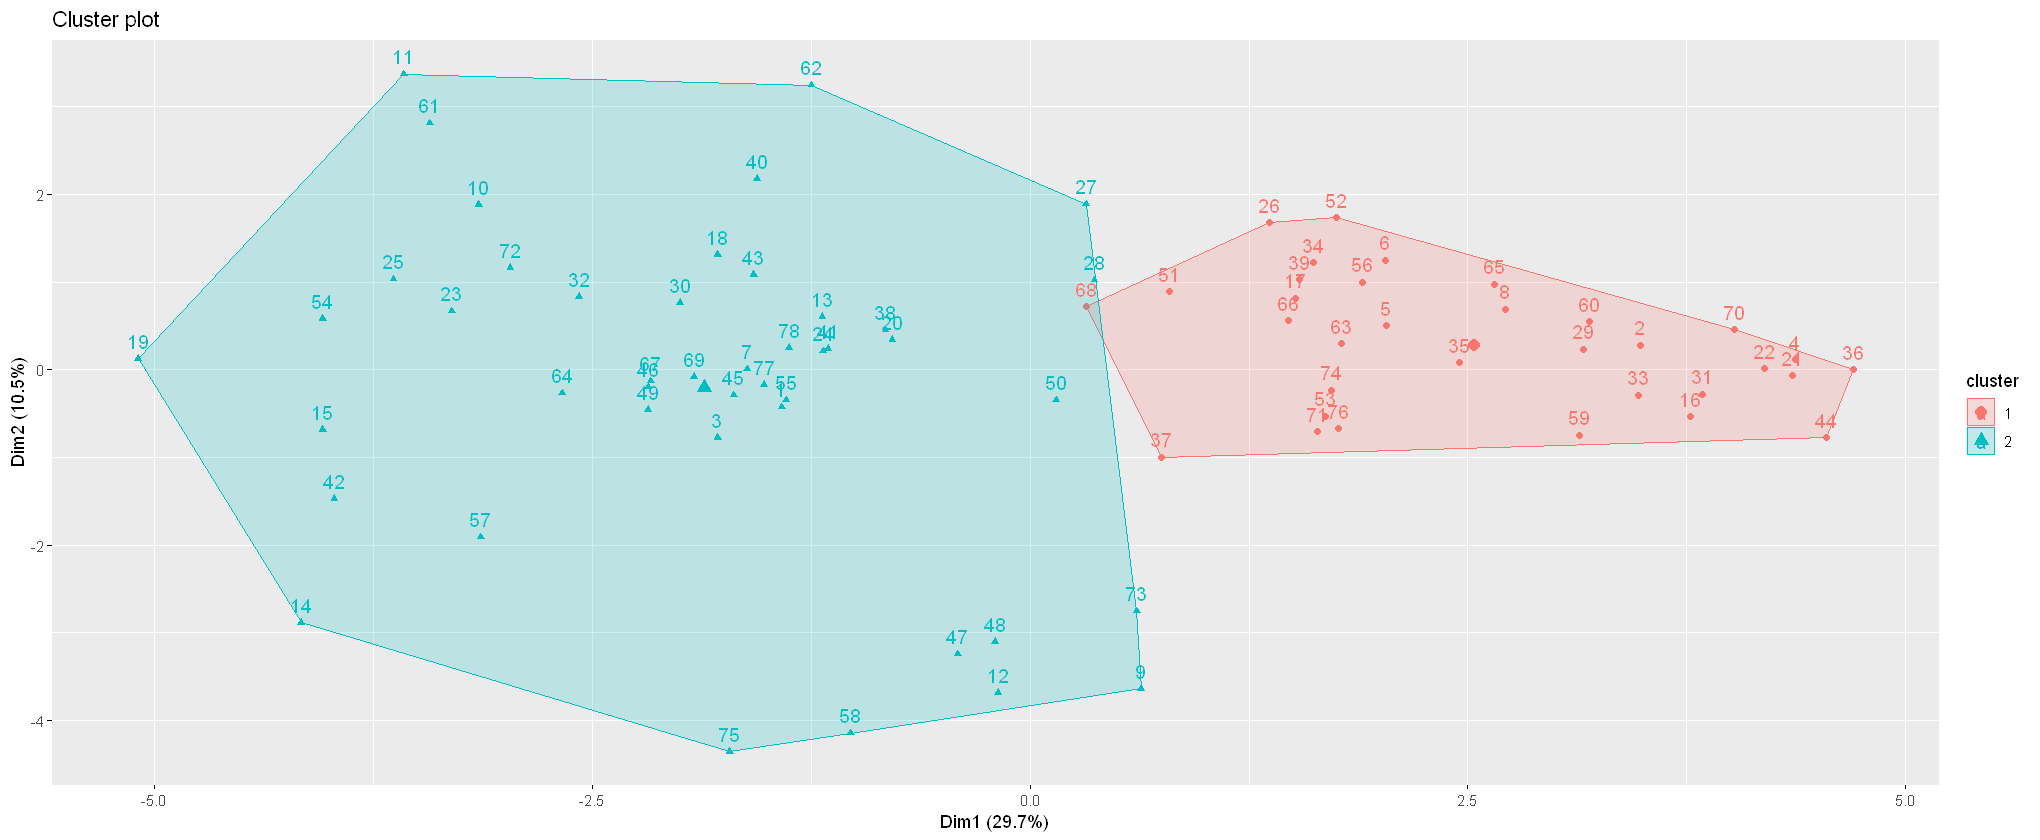

List of 9
 $ cluster     : int [1:78] 1 2 1 2 4 4 1 4 3 1 ...
 $ centers     : num [1:4, 1:22] 16.97 1.26 2.34 13.14 16.88 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:22] "ptap" "bore" "pspr" "uspr" ...
 $ totss       : num 417836
 $ withinss    : num [1:4] 65058 25397 20223 37850
 $ tot.withinss: num 148529
 $ betweenss   : num 269307
 $ size        : int [1:4] 35 14 7 22
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 4 clusters of sizes 35, 14, 7, 22

Cluster means:
       ptap      bore      pspr      uspr      pwel       uwel     surw
1 16.965714 16.880000 5.1800000 7.1028571  8.925714 11.6828571 8.125714
2  1.264286  2.664286 1.9357143 0.5785714  2.021429  0.6642857 1.692857
3  2.342857  4.042857 0.5285714 0.1857143 11.185714  3.5285714 2.242857
4 13.136364 14.731818 1.4500000 1.1772727  3.340909  4.0500000 3.450000
       tles      tmor     rain      phom     imws      pipy     truc      ctan
1 53.108571 17.840000 1.134286  5.168571 70.28857  8.291429 1.031429 0.5514286
2  9.028571  0.800000 6.114286 43.464286 95.20714  6.364286 1.578571 0.5785714
3  0.000000  0.000000 6.985714 31.714286 66.77143  6.271429 0.400000 0.4142857
4 25.204545  4.245455 1.190909 22.904545 86.25455 19.881818 2.277273 0.4363636
       bott      uiws      othw     iwsp     basw      liws     watp
1  0.600000 29.674286 0.3457143 24.47714 59.50286 9.8514286 27.60571
2 28.685714  4.792857 0.6000000 8

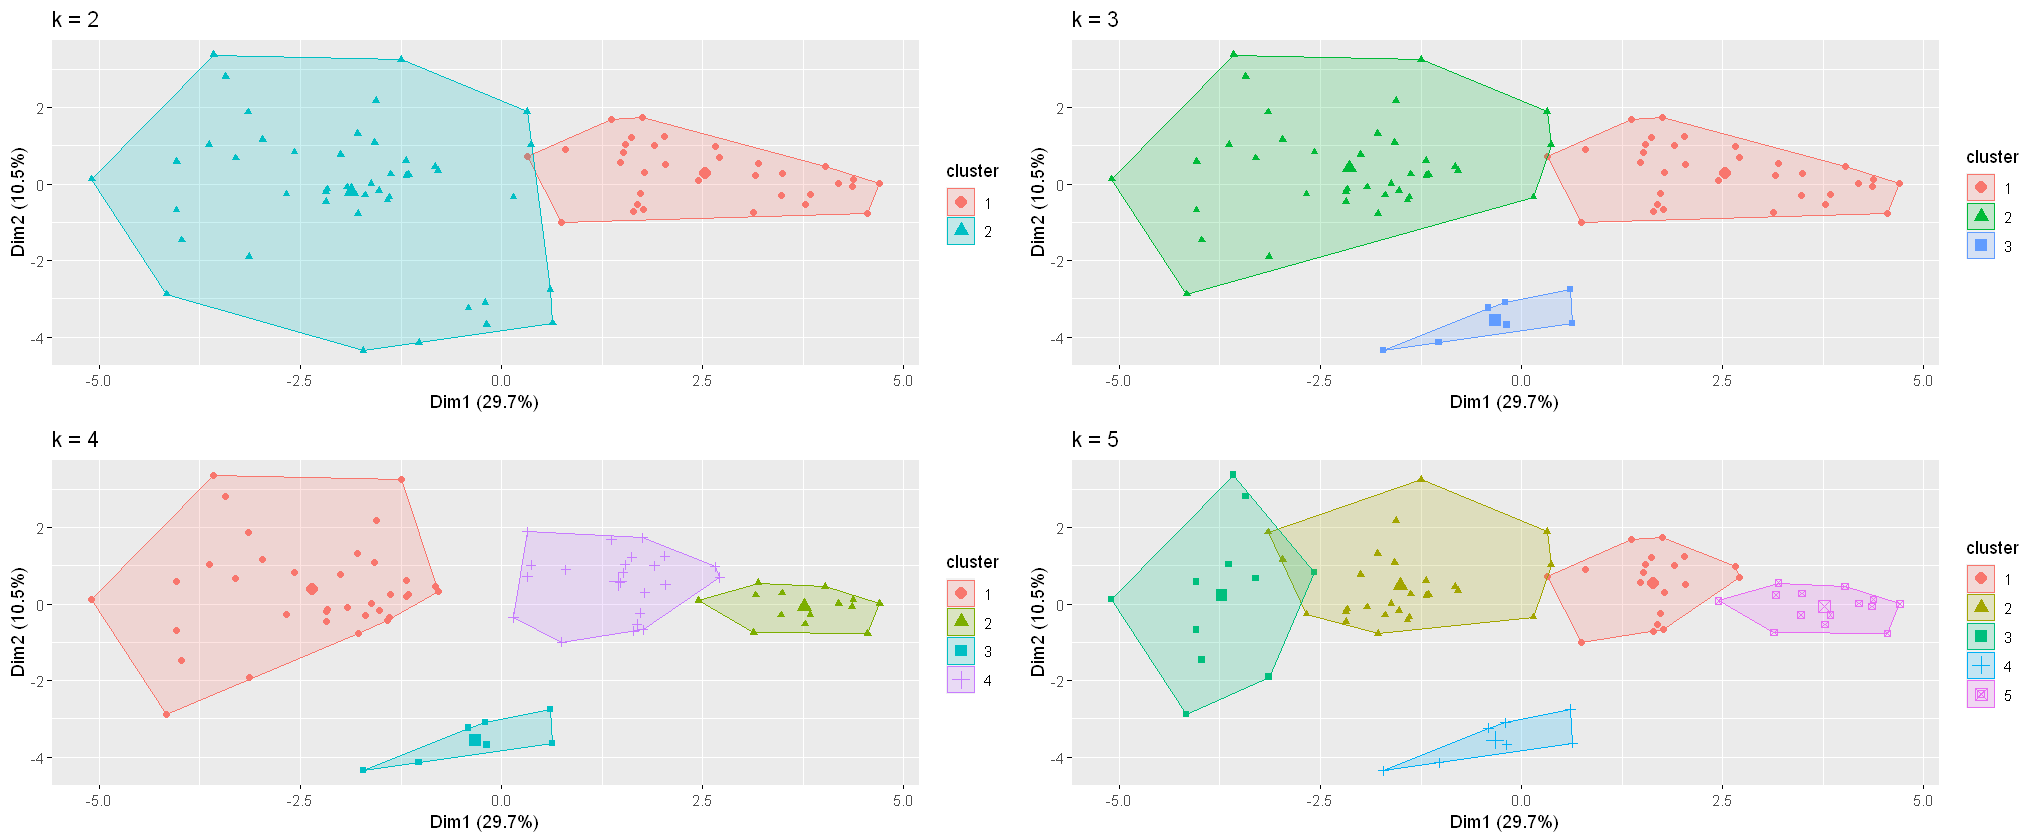

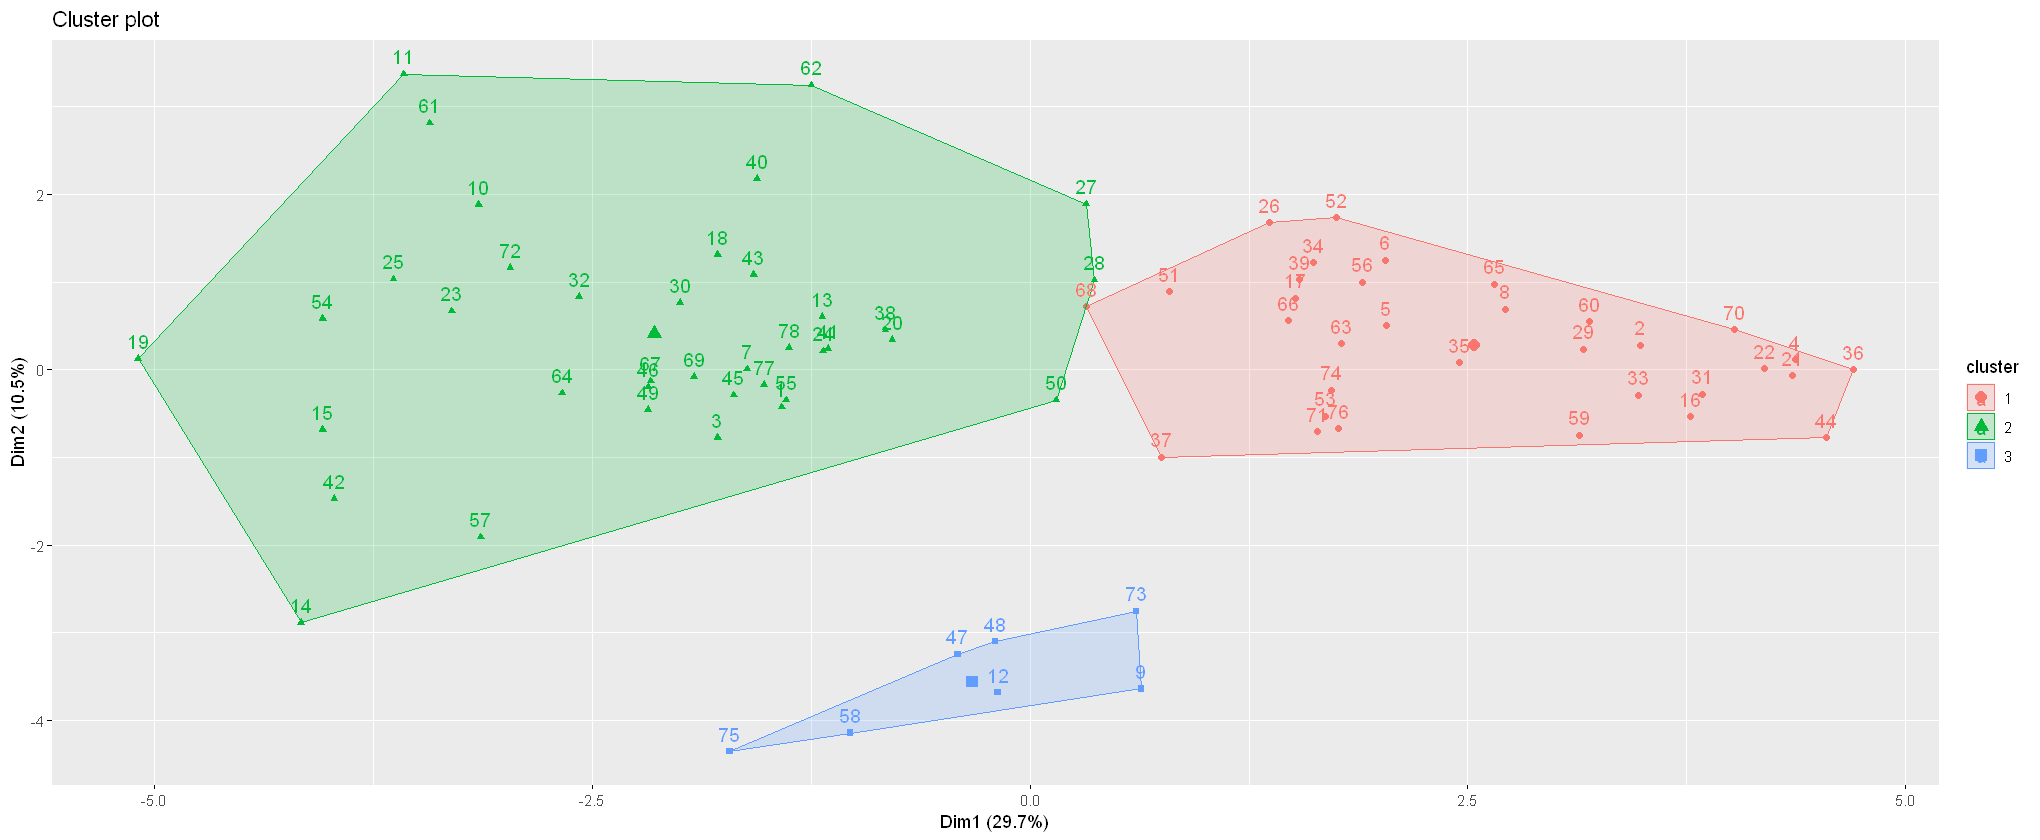

In [41]:
distance <- get_dist(df.wa)
labels(distance) <- dfsimple$Country
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high="#FC4E07"), lab_size = 7 )
k2 <- kmeans(df.wa, centers = 2, nstart = 25)
str(k2)
k2
fviz_cluster(k2, data = df.wa ,  )
# it is often advantageous to use several different values of k and examine the differences in the results.
# We can execute the same process for 3, 4, and 5 clusters, and the results are shown in the figure:
k3 <- kmeans(df.wa, centers = 3, nstart = 25)
k4 <- kmeans(df.wa, centers = 4, nstart = 25)
k5 <- kmeans(df.wa, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df.wa) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df.wa) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df.wa) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df.wa) + ggtitle("k = 5")
grid.arrange(p1, p2, p3, p4, nrow = 2)
str(k4)
k4
fviz_cluster(k3, data = df.wa , )

# Gap Stat Method

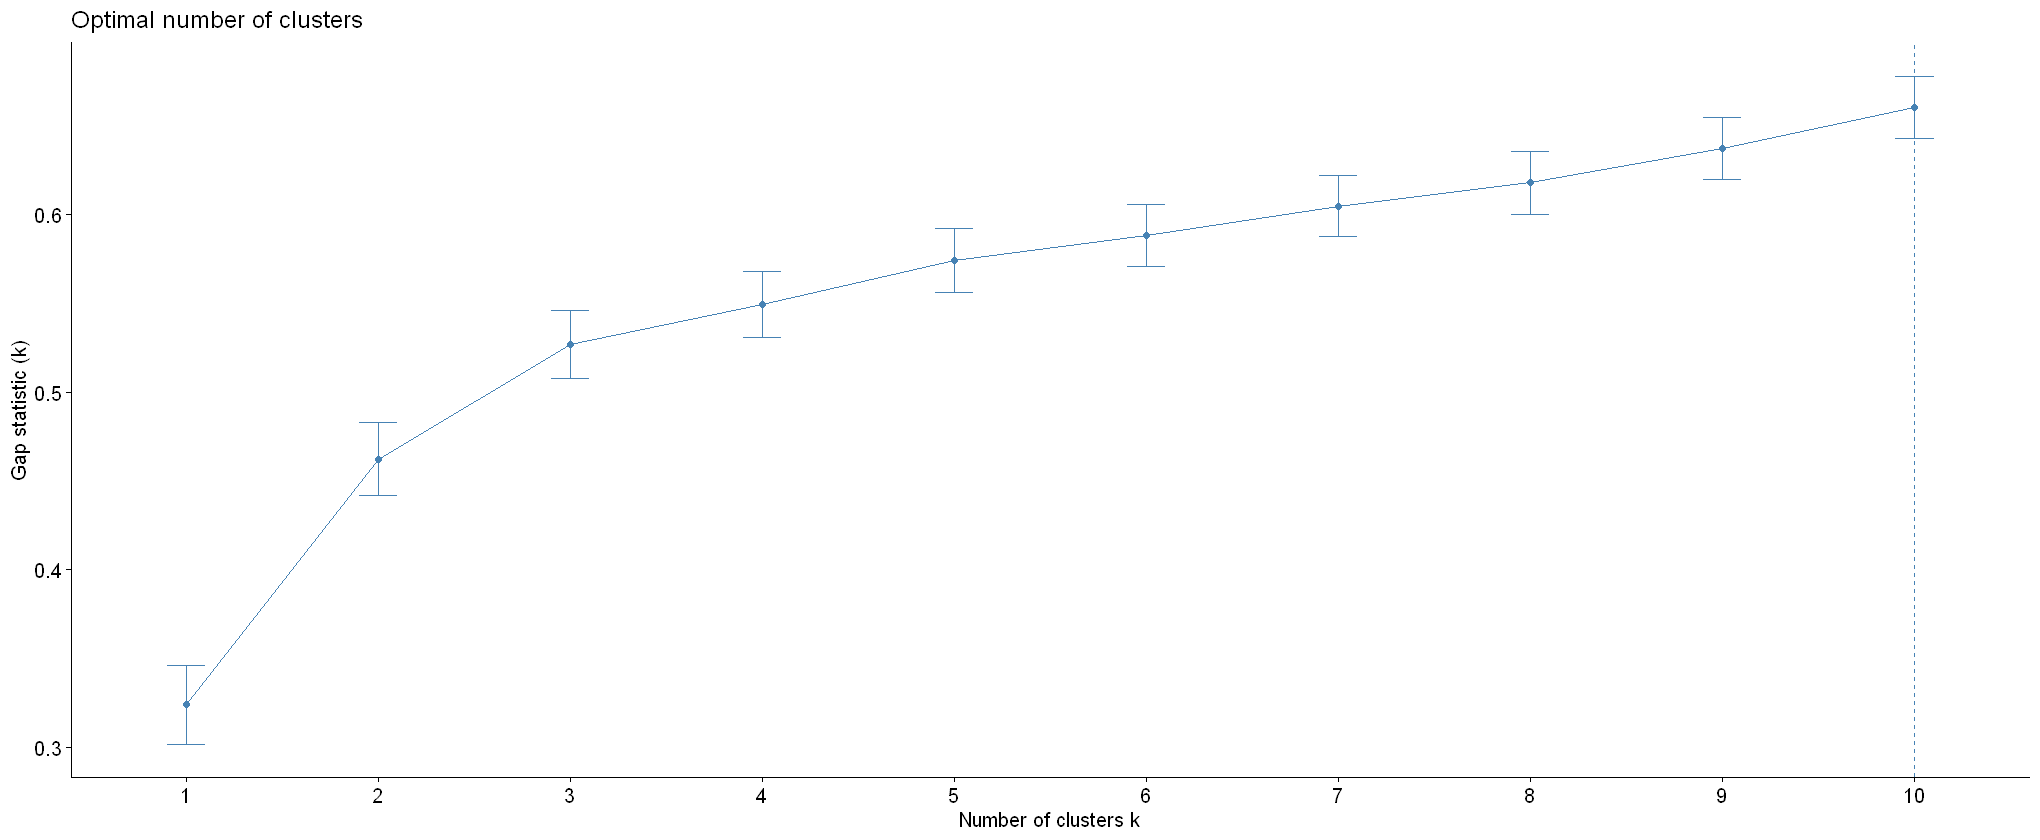

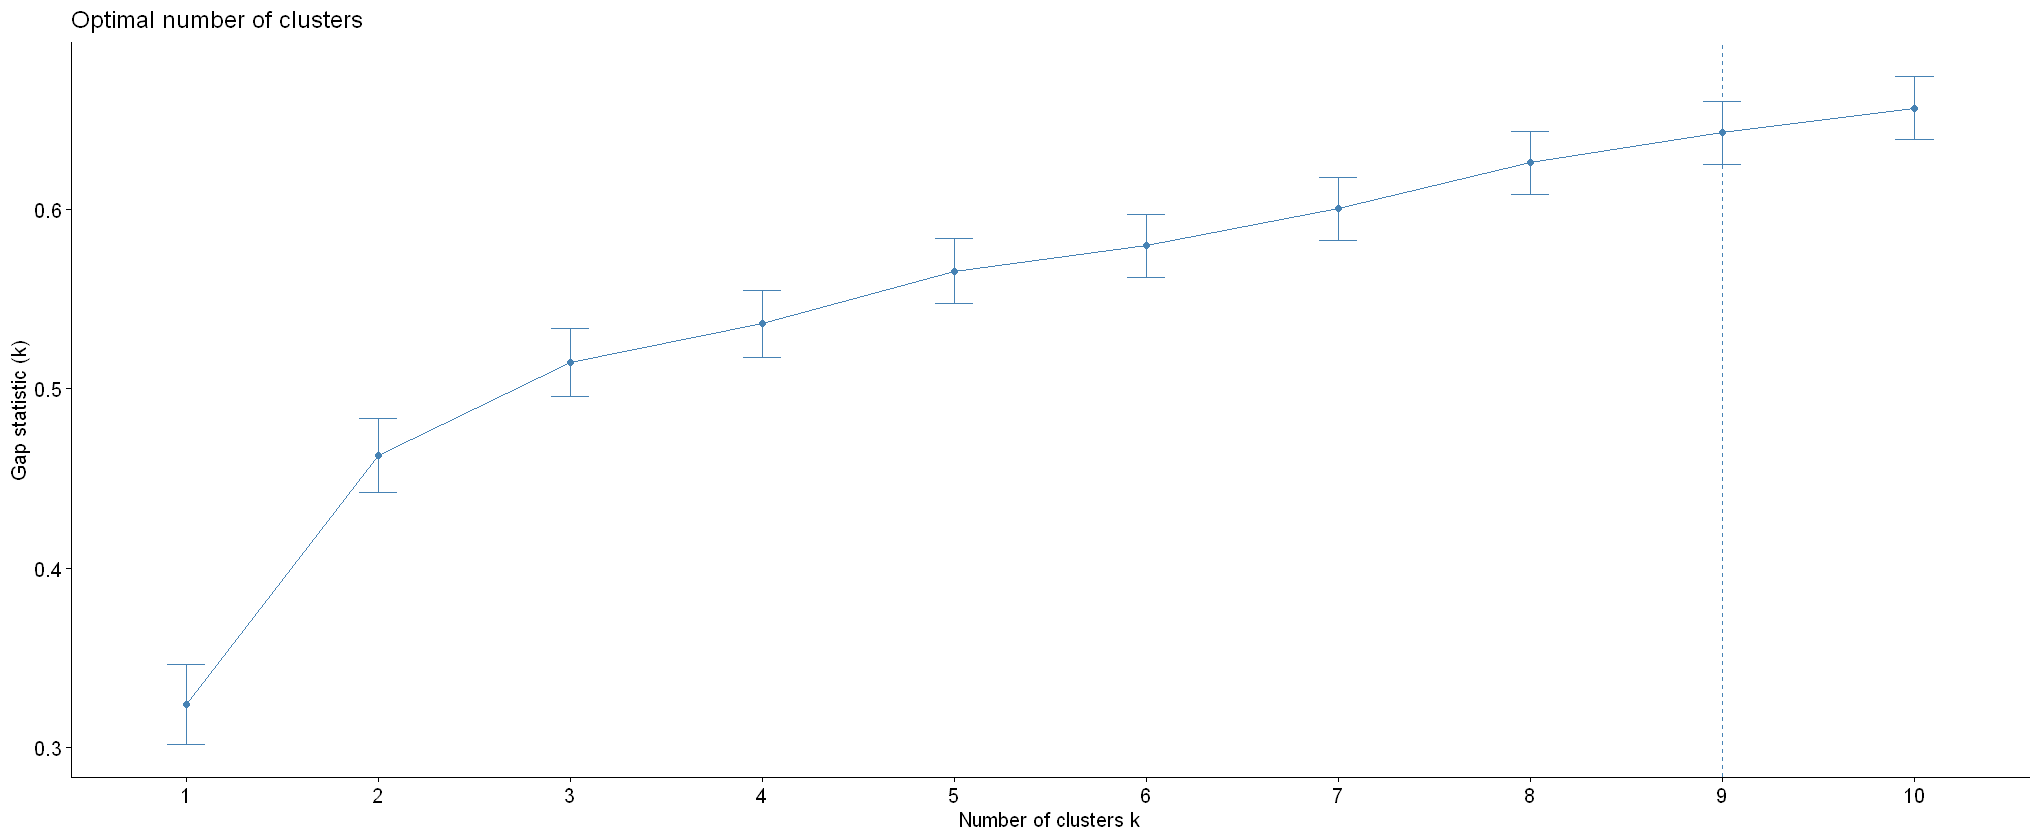

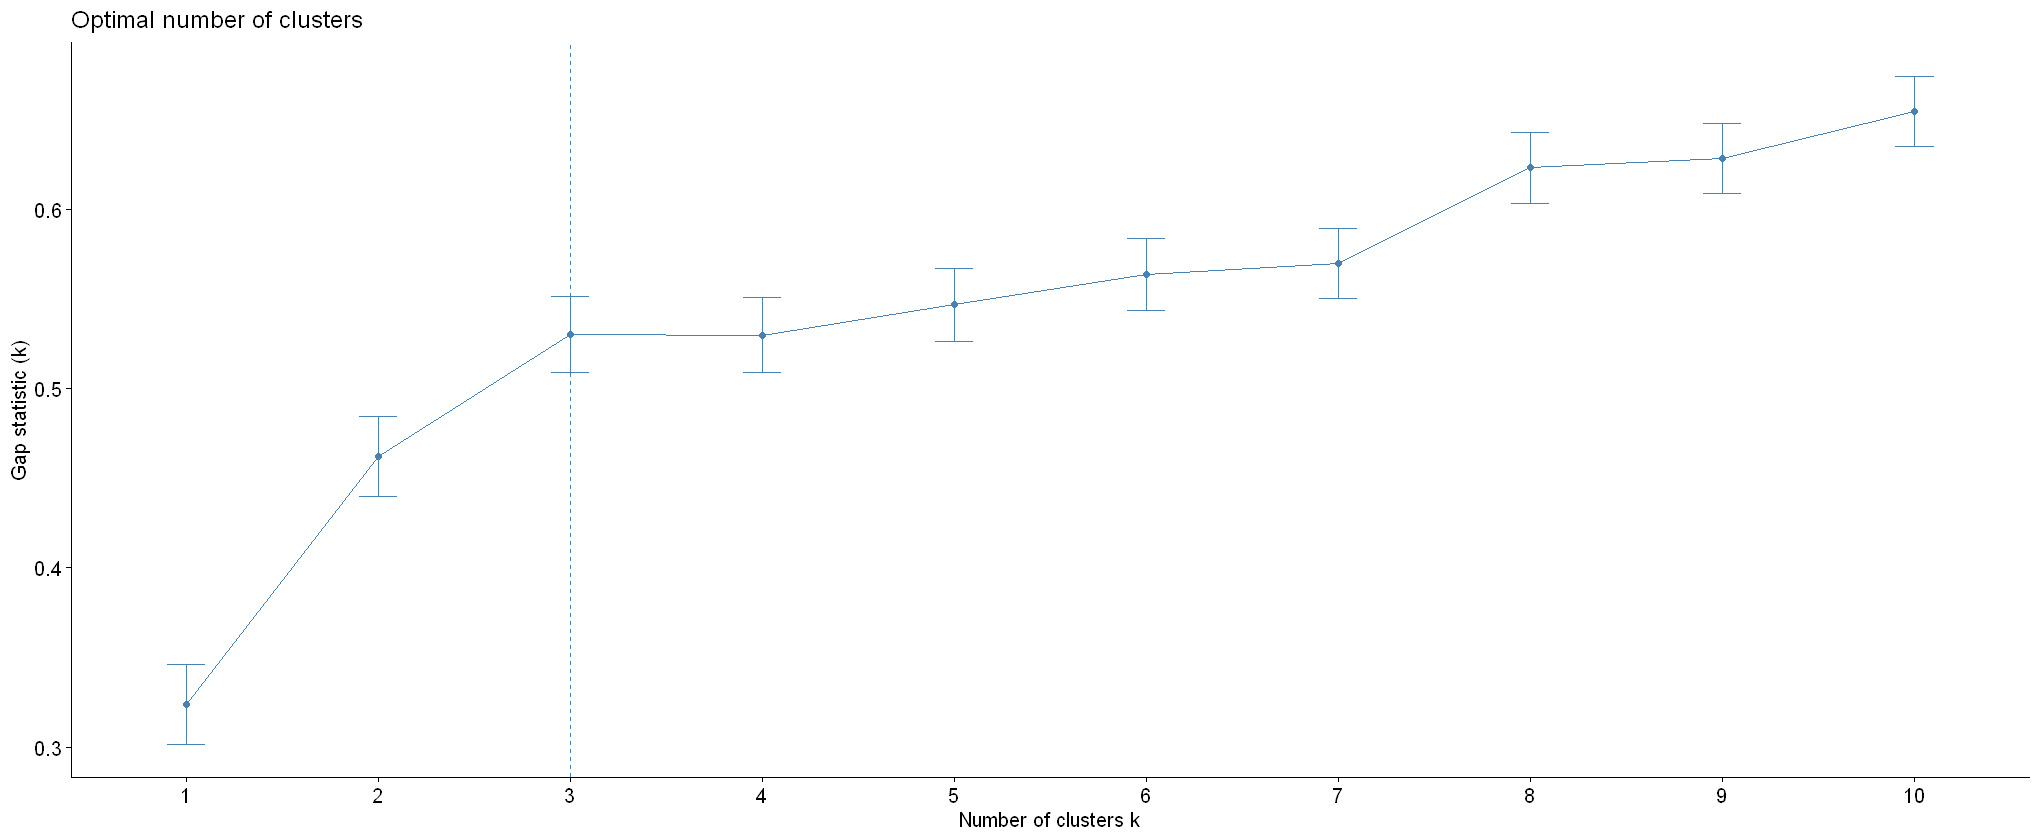

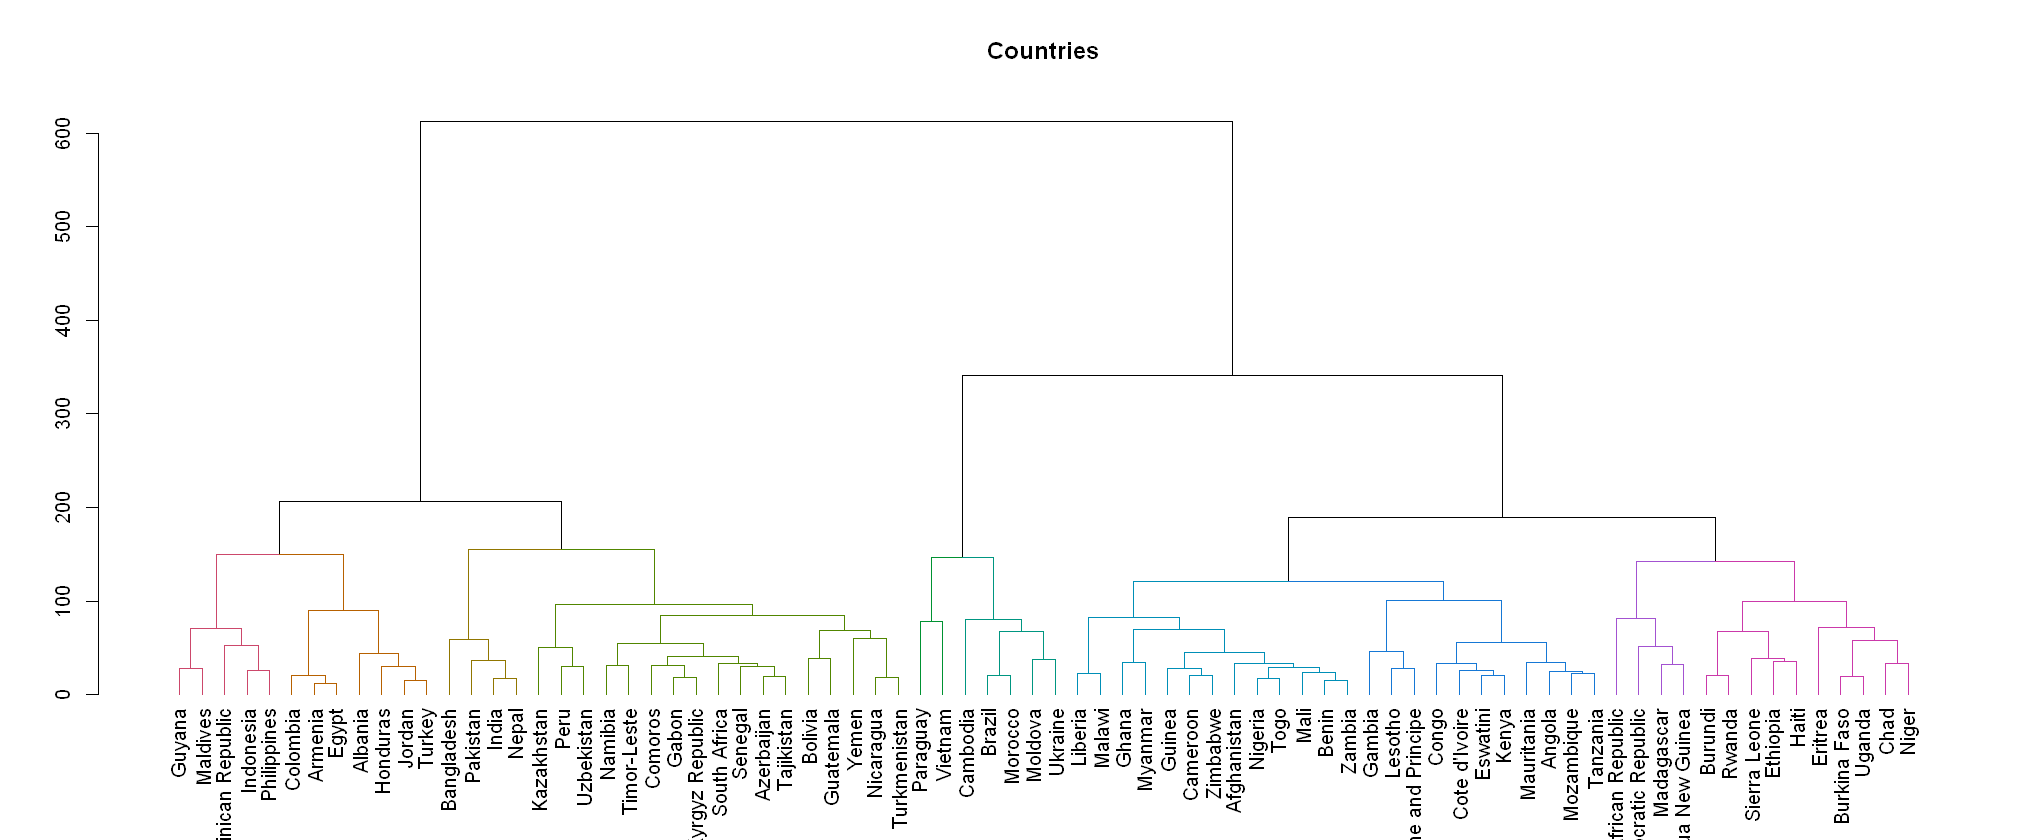

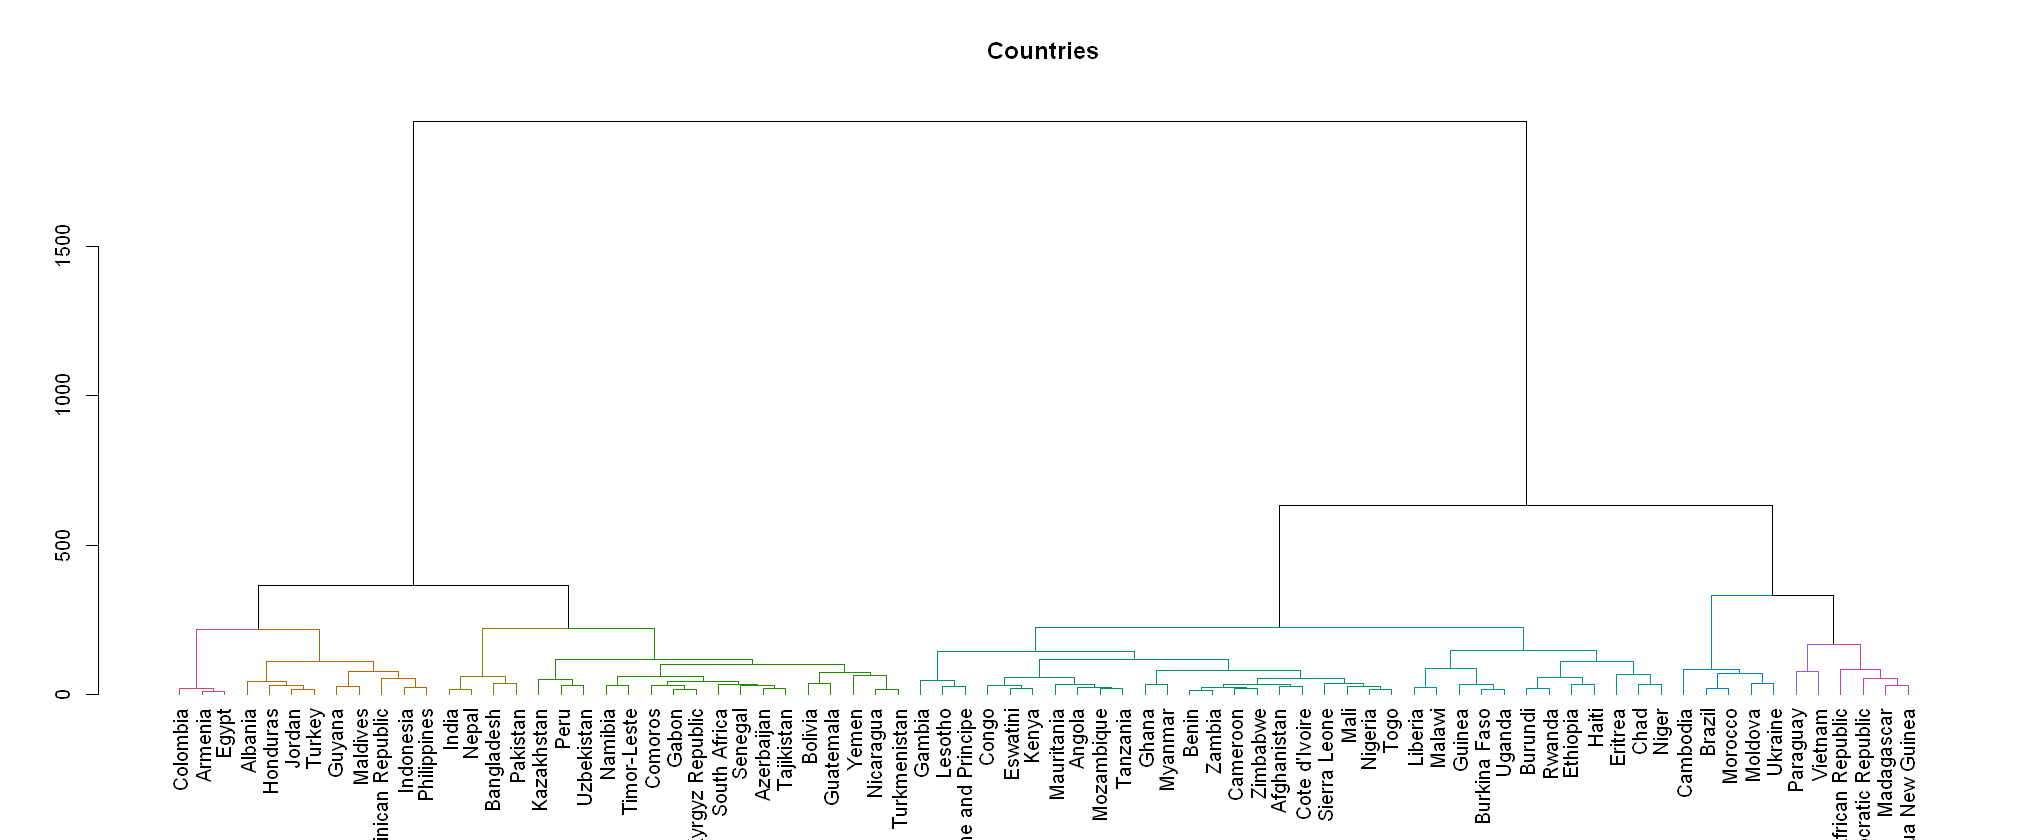

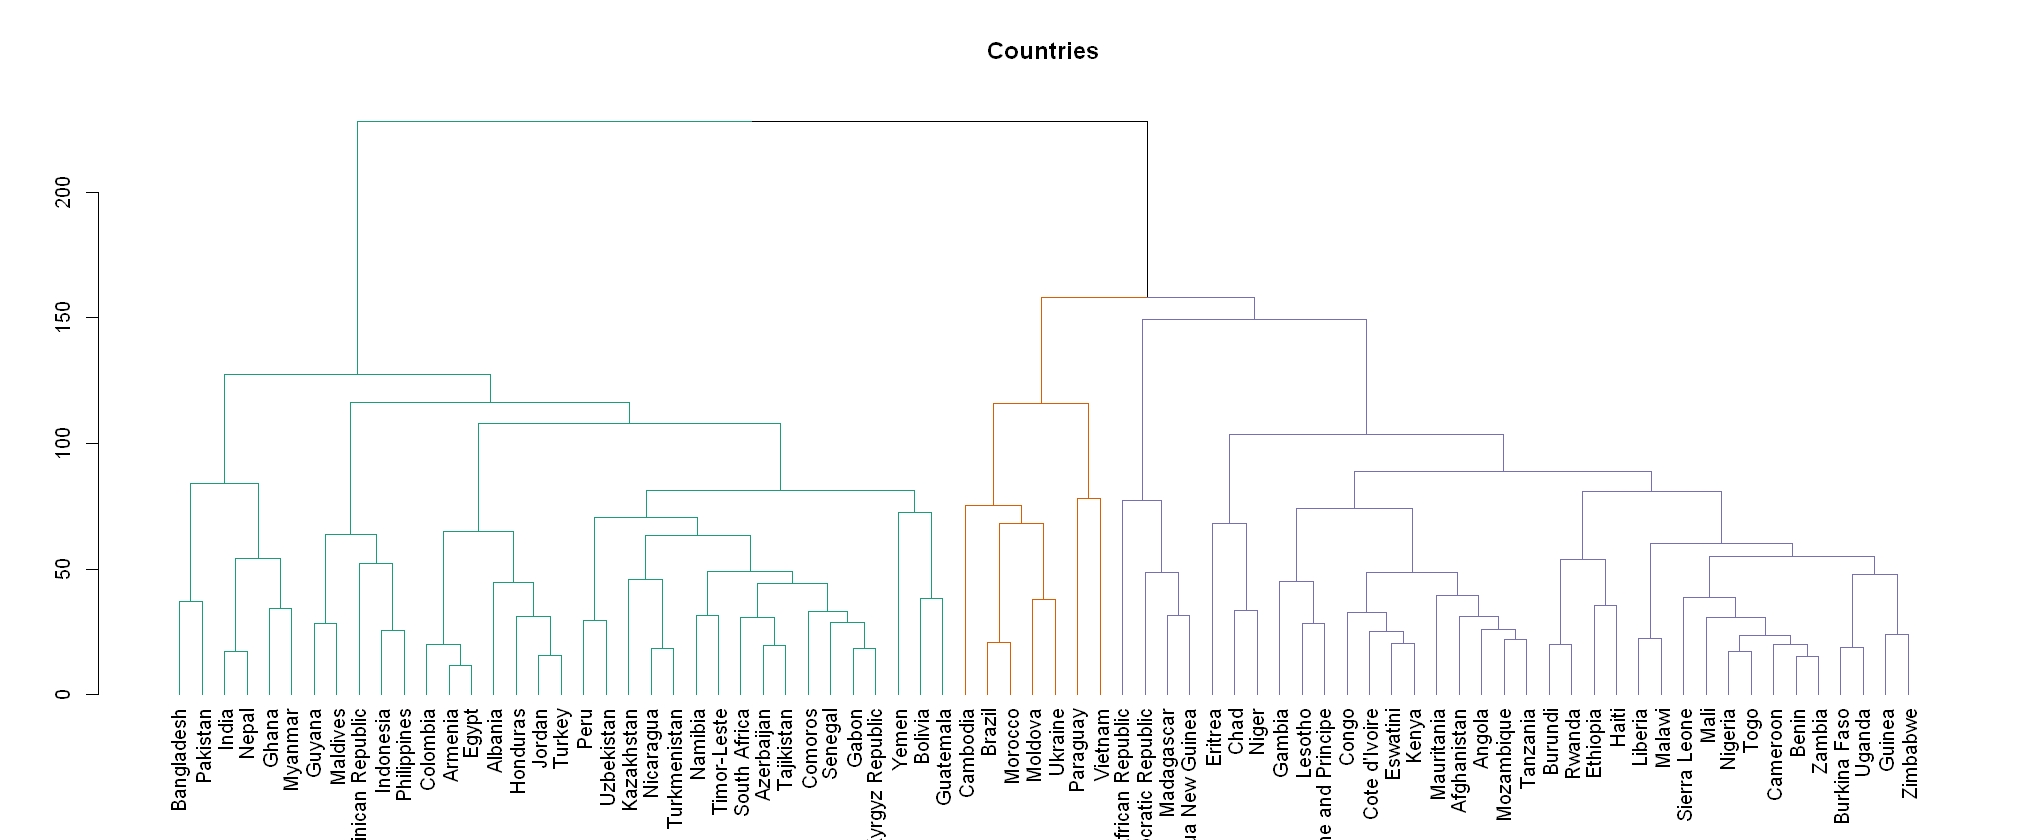

In [42]:
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D2" ,
                    K.max = 10, B = 1000,  method = c('Tibs2001SEmax'))
fviz_gap_stat(gap_stat)


set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D" ,
                    K.max = 10, B = 1000, method ='Tibs2001SEmax', SE.factor = 1)

fviz_gap_stat(gap_stat)
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="complete" ,
                    K.max = 10, B = 1000)
fviz_gap_stat(gap_stat)
### Fancy Clustering Graph for WARD D2 Gap ### 
dend <- as.dendrogram(hc.ward2)
dend <- color_branches(dend, k=10)

labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Ward Gap ###
dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=9)

labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Complete Gap ###
dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=3,col = c("#1b9e77","#d95f02","#7570b3"))

labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )